In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv(
    "/content/drive/MyDrive/drug_review_dataset_drugs_com/drugsComTrain_raw.csv/drugsComTrain_raw.csv",
    parse_dates=["date"],
    date_format="%d-%b-%y"
)

df_test = pd.read_csv(
    "/content/drive/MyDrive/drug_review_dataset_drugs_com/drugsComTest_raw.csv/drugsComTest_raw.csv",
    parse_dates=["date"],
    date_format="%d-%b-%y"
)


In [ ]:

print("Train shape :" ,df_train.shape)
print("Test shape :", df_test.shape)

Train shape : (161297, 7)
Test shape : (53766, 7)


In [ ]:
df_train.head(10)

uniqueID                            drugName                     condition  \
0    206461                           Valsartan  Left Ventricular Dysfunction   
1     95260                          Guanfacine                          ADHD   
2     92703                              Lybrel                 Birth Control   
3    138000                          Ortho Evra                 Birth Control   
4     35696            Buprenorphine / naloxone             Opiate Dependence   
5    155963                              Cialis  Benign Prostatic Hyperplasia   
6    165907                      Levonorgestrel       Emergency Contraception   
7    102654                        Aripiprazole               Bipolar Disorde   
8     74811                              Keppra                      Epilepsy   
9     48928  Ethinyl estradiol / levonorgestrel                 Birth Control   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9 2012-05-20   
1  "My son is halfway through his fourth week of ...       8 2010-04-27   
2  "I used to take another oral contraceptive, wh...       5 2009-12-14   
3  "This is my first time using any form of birth...       8 2015-11-03   
4  "Suboxone has completely turned my life around...       9 2016-11-27   
5  "2nd day on 5mg started to work with rock hard...       2 2015-11-28   
6  "He pulled out, but he cummed a bit in me. I t...       1 2017-03-07   
7  "Abilify changed my life. There is hope. I was...      10 2015-03-14   
8  " I Ve had  nothing but problems with the Kepp...       1 2016-08-09   
9  "I had been on the pill for many years. When m...       8 2016-12-08   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37  
5           43  
6            5  
7           32  
8           11  
9            1

In [ ]:
#checking if there are not more than one reviews per patient

print("unique values count of train : " ,len(set(df_train['uniqueID'].values)))
print("length of train : " ,df_train.shape[0])

unique values count of train :  161297
length of train :  161297


In [ ]:
# Combine the datasets
df_all = pd.concat([df_train, df_test])

In [ ]:
# describing the combined dataset

df_all.describe()

uniqueID         rating                           date  \
count  215063.000000  215063.000000                         215063   
mean   116039.364814       6.990008  2014-06-11 00:32:14.793060608   
min         0.000000       1.000000            2008-02-24 00:00:00   
25%     58115.500000       5.000000            2012-04-12 00:00:00   
50%    115867.000000       8.000000            2015-06-07 00:00:00   
75%    173963.500000      10.000000            2016-08-19 00:00:00   
max    232291.000000      10.000000            2017-12-12 00:00:00   
std     67007.913366       3.275554                            NaN   

         usefulCount  
count  215063.000000  
mean       28.001004  
min         0.000000  
25%         6.000000  
50%        16.000000  
75%        36.000000  
max      1291.000000  
std        36.346069

In [ ]:
# taking out information from the data
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   uniqueID     215063 non-null  int64         
 1   drugName     215063 non-null  object        
 2   condition    213869 non-null  object        
 3   review       215063 non-null  object        
 4   rating       215063 non-null  int64         
 5   date         215063 non-null  datetime64[ns]
 6   usefulCount  215063 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 13.1+ MB


In [ ]:
# get the datatype of columns
df_all.dtypes

uniqueID                int64
drugName               object
condition              object
review                 object
rating                  int64
date           datetime64[ns]
usefulCount             int64
dtype: object

In [ ]:
# checking if the data contains any NULL values
df_all.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

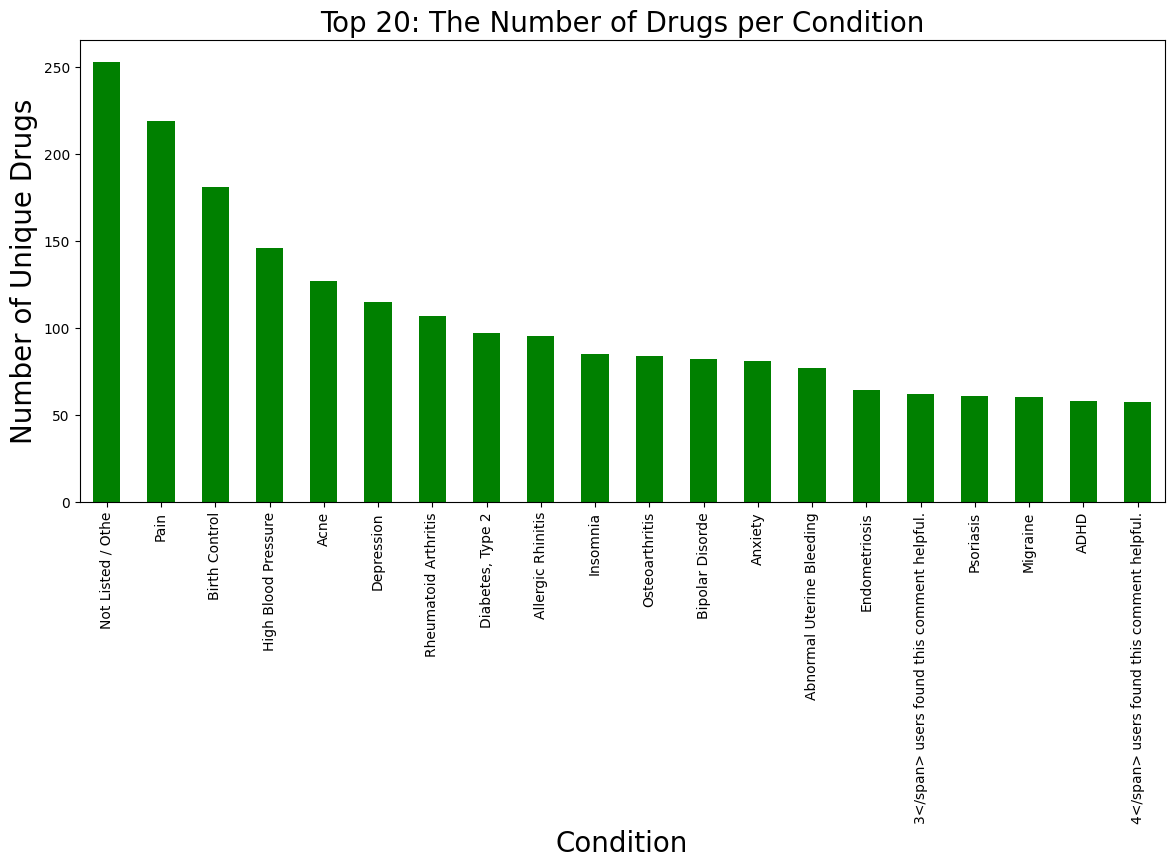

In [ ]:
# Calculate the number of unique drugs per condition
condition_dn = df_all.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)

# Create the plot
fig, ax = plt.subplots(figsize=(14, 6))
condition_dn[0:20].plot(kind="bar", ax=ax, color="green", fontsize=10)
ax.set_xlabel("Condition", fontsize=20)
ax.set_ylabel("Number of Unique Drugs", fontsize=20)
ax.set_title("Top 20: The Number of Drugs per Condition", fontsize=20)
plt.show()

#We see there are more than 200 number of unique drugs for the condition of Pain.

<ipython-input-13-67dde4ed2af4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'summer')


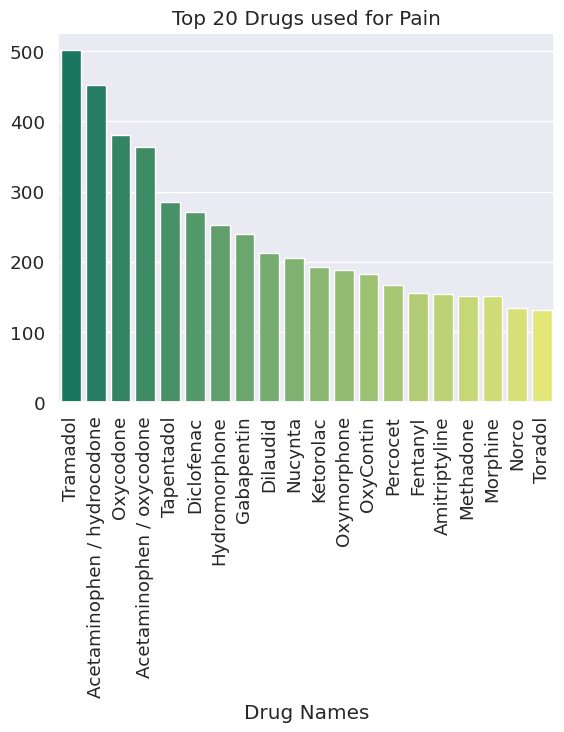

In [ ]:
# Top 10 drugs which are used for the top condition, that is Pain

df1 = df_all[df_all['condition'] == 'Pain']['drugName'].value_counts()[0: 20]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 20 Drugs used for Pain")
plt.setp(sns_.get_xticklabels(), rotation = 90);

Text(0.5, 1.0, 'Bottom20 : The number of drugs per condition.')

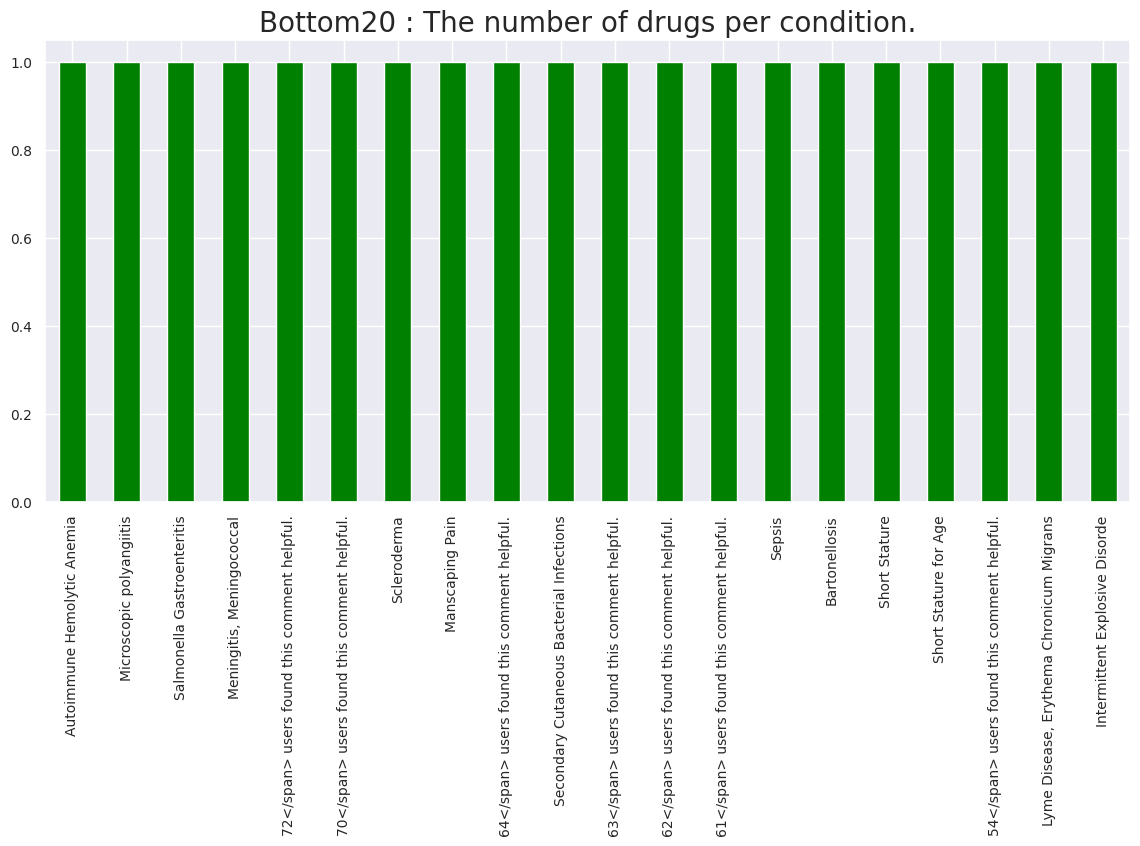

In [ ]:
#the least recommended drugs were only recommeded once
#"users found this comment useful" appears in the condition, which seems like an error in the crawling process
#harshit we are doing the same thing in the next cell as well, delete this one i guess
condition_dn = df_all.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)

condition_dn[condition_dn.shape[0]-20:condition_dn.shape[0]].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Bottom20 : The number of drugs per condition.", fontsize = 20)

In [ ]:
# inspecting the condition "users found this comment helpful"
df_all[df_all['condition']=='3</span> users found this comment helpful.'].head(10)

uniqueID         drugName                                   condition  \
243       81588              Yaz  3</span> users found this comment helpful.   
1864     124318            Skyla  3</span> users found this comment helpful.   
3322     202848       ProAir HFA  3</span> users found this comment helpful.   
6355     195303  Low-Ogestrel-21  3</span> users found this comment helpful.   
6968     230747          Tazorac  3</span> users found this comment helpful.   
7420      43686     LoSeasonique  3</span> users found this comment helpful.   
9396      94908          Abilify  3</span> users found this comment helpful.   
9730     175555        Augmentin  3</span> users found this comment helpful.   
9742       6424           Ocella  3</span> users found this comment helpful.   
10198     56795           Elavil  3</span> users found this comment helpful.   

                                                  review  rating       date  \
243    "I took Yaz for a little over 2 years.  From a...       3 2010-06-01   
1864   "Never pregnant,28,retroverted small (6cm) ute...       1 2015-12-16   
3322   "I get chest colds and asthmatic symptoms in t...       9 2015-12-12   
6355   "After taking it for two months I noticed some...       8 2011-05-16   
6968   "Started this 11 weeks ago. I am so so sad rig...       2 2016-05-31   
7420   "I started taking LoSeasonique because I wante...       3 2011-11-16   
9396   "This really works although there is some rest...       7 2010-05-11   
9730   "Well I took augmentin for 5 days and I solved...       6 2015-06-30   
9742   "I have been taking Ocella for 7 months now. A...       6 2011-08-08   
10198  "I used to get migraines 3-5 times a week, one...      10 2009-03-10   

       usefulCount  
243              3  
1864             3  
3322             3  
6355             3  
6968             3  
7420             3  
9396             3  
9730             3  
9742             3  
10198            3

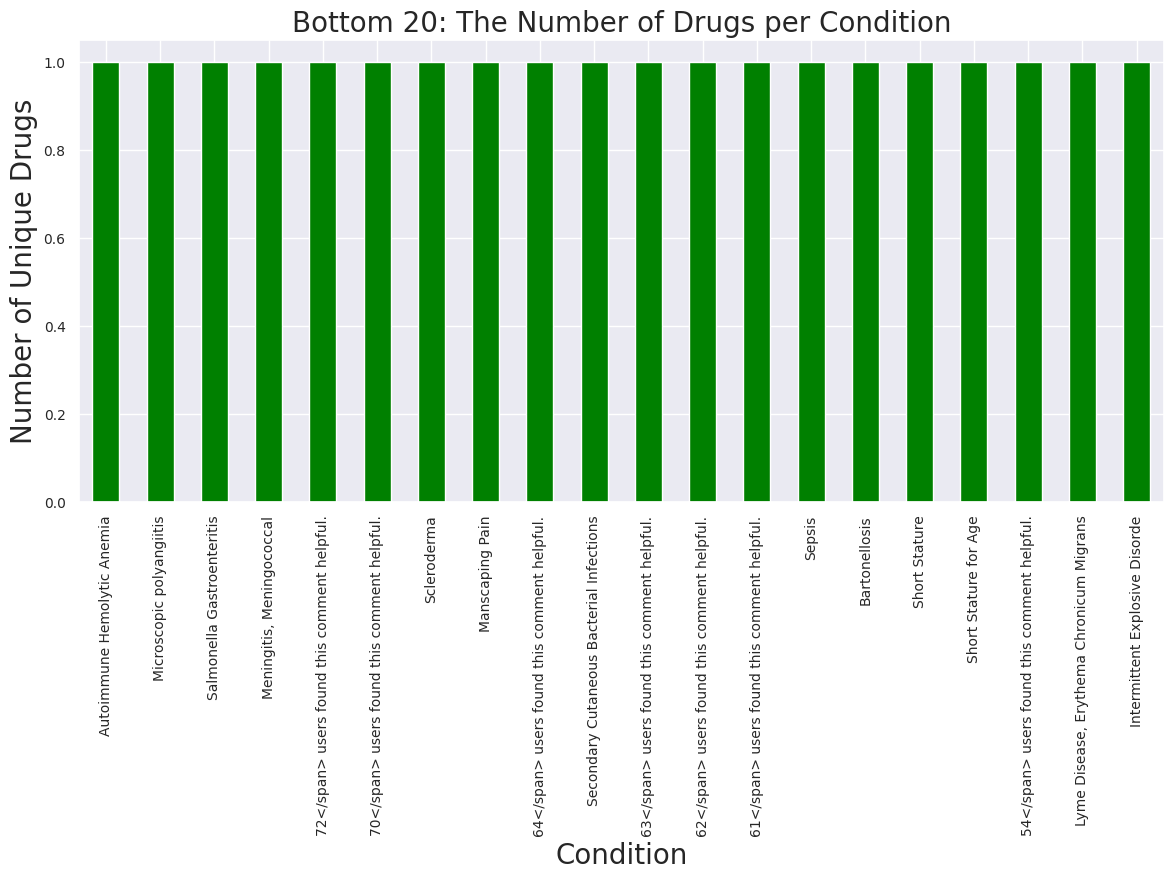

In [ ]:
# Calculate the number of unique drugs per condition
condition_dn = df_all.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)

# Plot the bottom 20 conditions with the fewest unique drugs
fig, ax = plt.subplots(figsize=(14, 6))
condition_dn.tail(20).plot(kind="bar", ax=ax, color="green", fontsize=10)
ax.set_xlabel("Condition", fontsize=20)
ax.set_ylabel("Number of Unique Drugs", fontsize=20)
ax.set_title("Bottom 20: The Number of Drugs per Condition", fontsize=20)
plt.show()


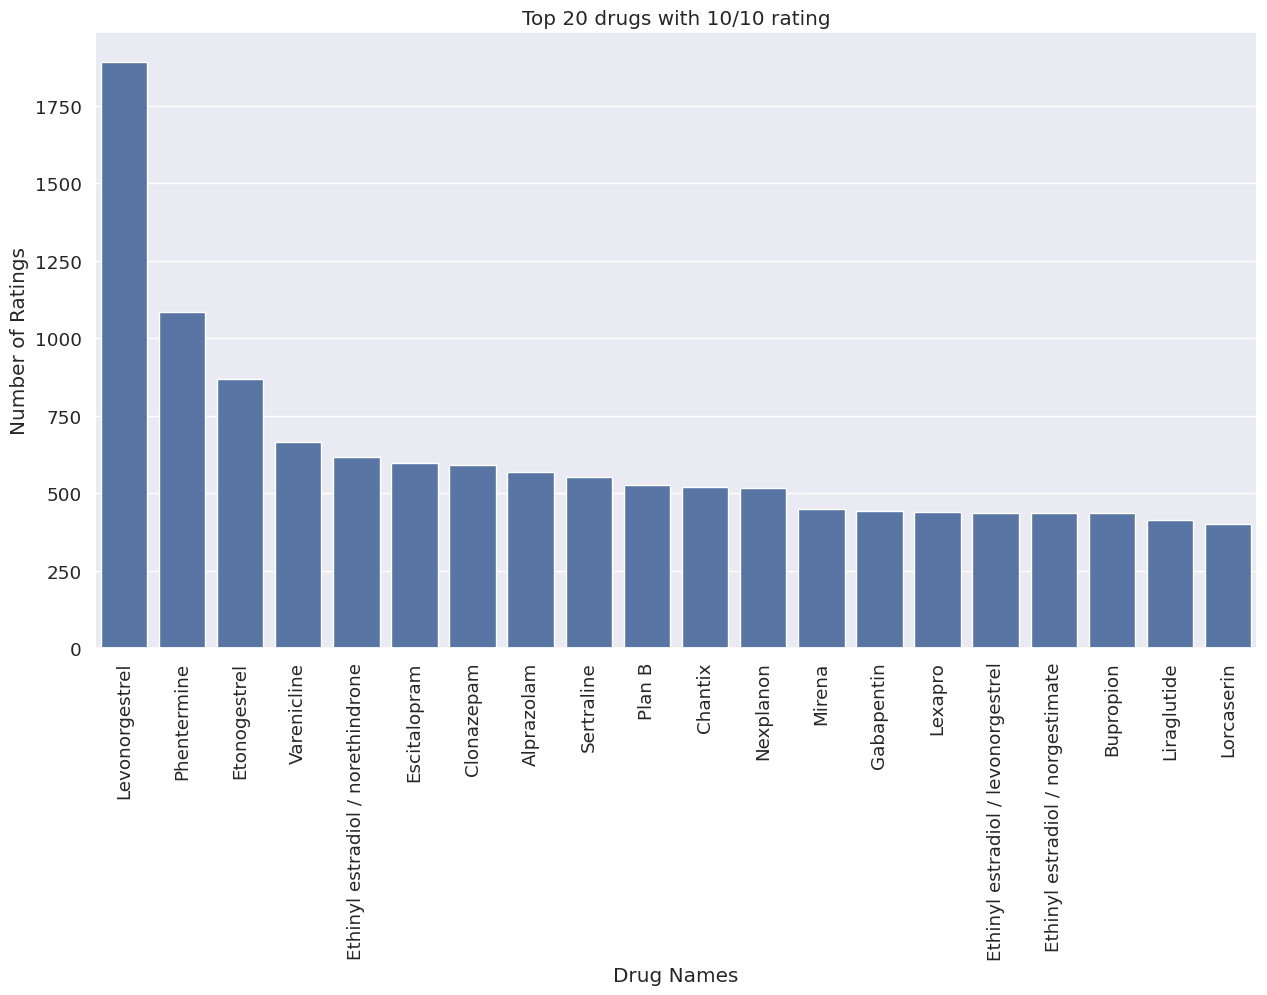

In [ ]:
# This barplot shows the top 20 drugs with the 10/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_all.loc[df_all.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

<ipython-input-18-11990c56d5e9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')


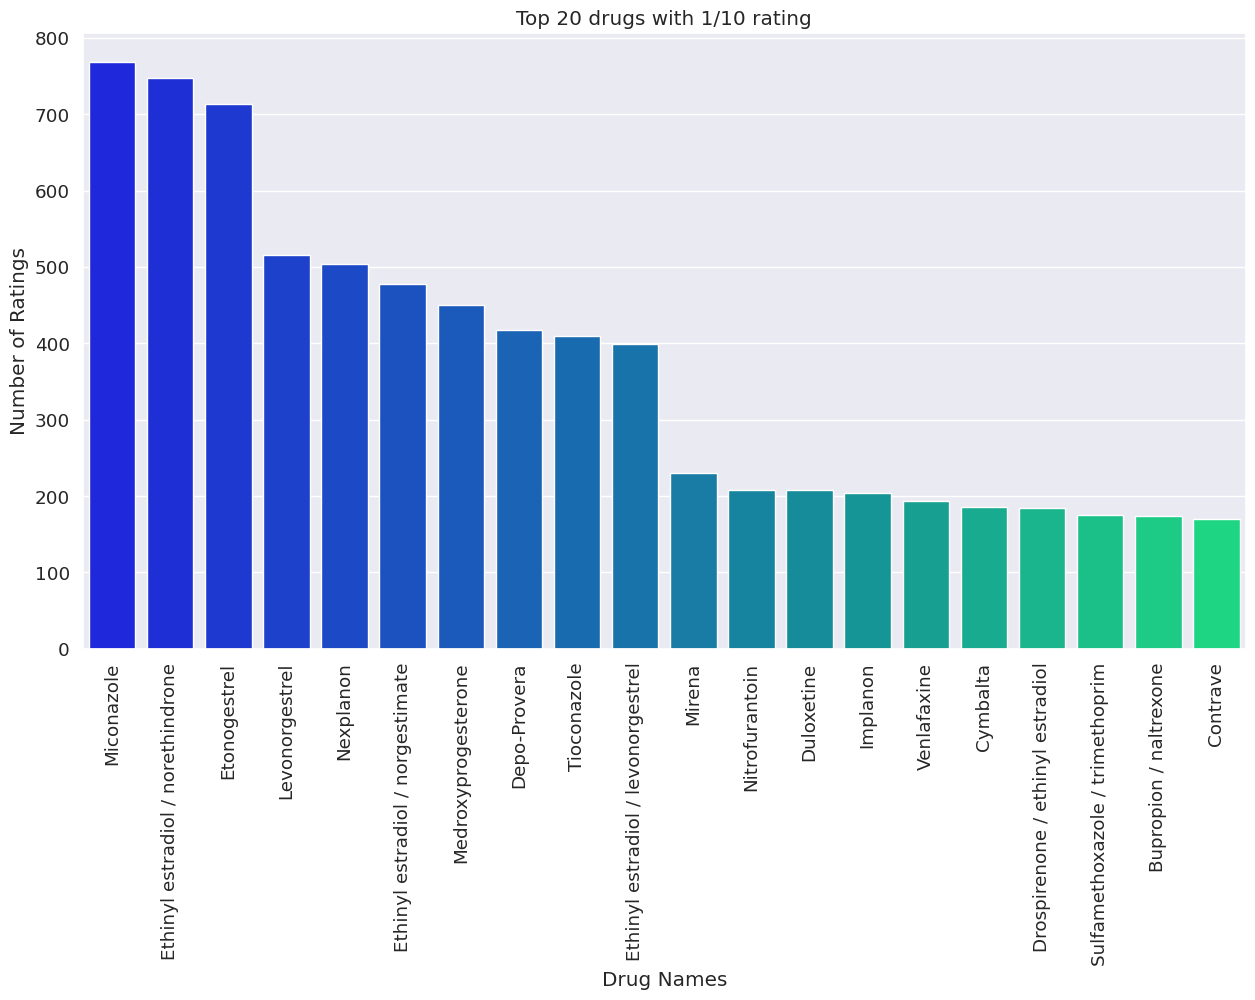

In [ ]:
# This barplot shows the Top 20 drugs with the 1/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_all.loc[df_all.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

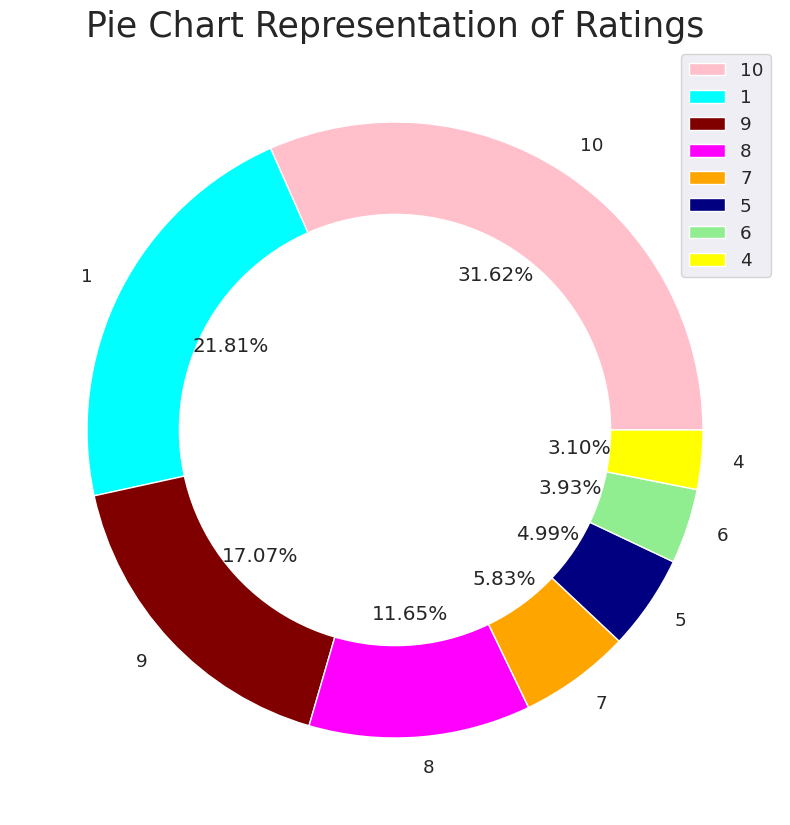

In [ ]:
# making a donut chart to represent share of each ratings
#The rating of 10 is more than twice as many as the others.
size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow']
labels = "10", "1", "9", "8", "7", "5", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [ ]:
# checking a review
df_train['review'][1]


'"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."'

In [ ]:
df_train['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

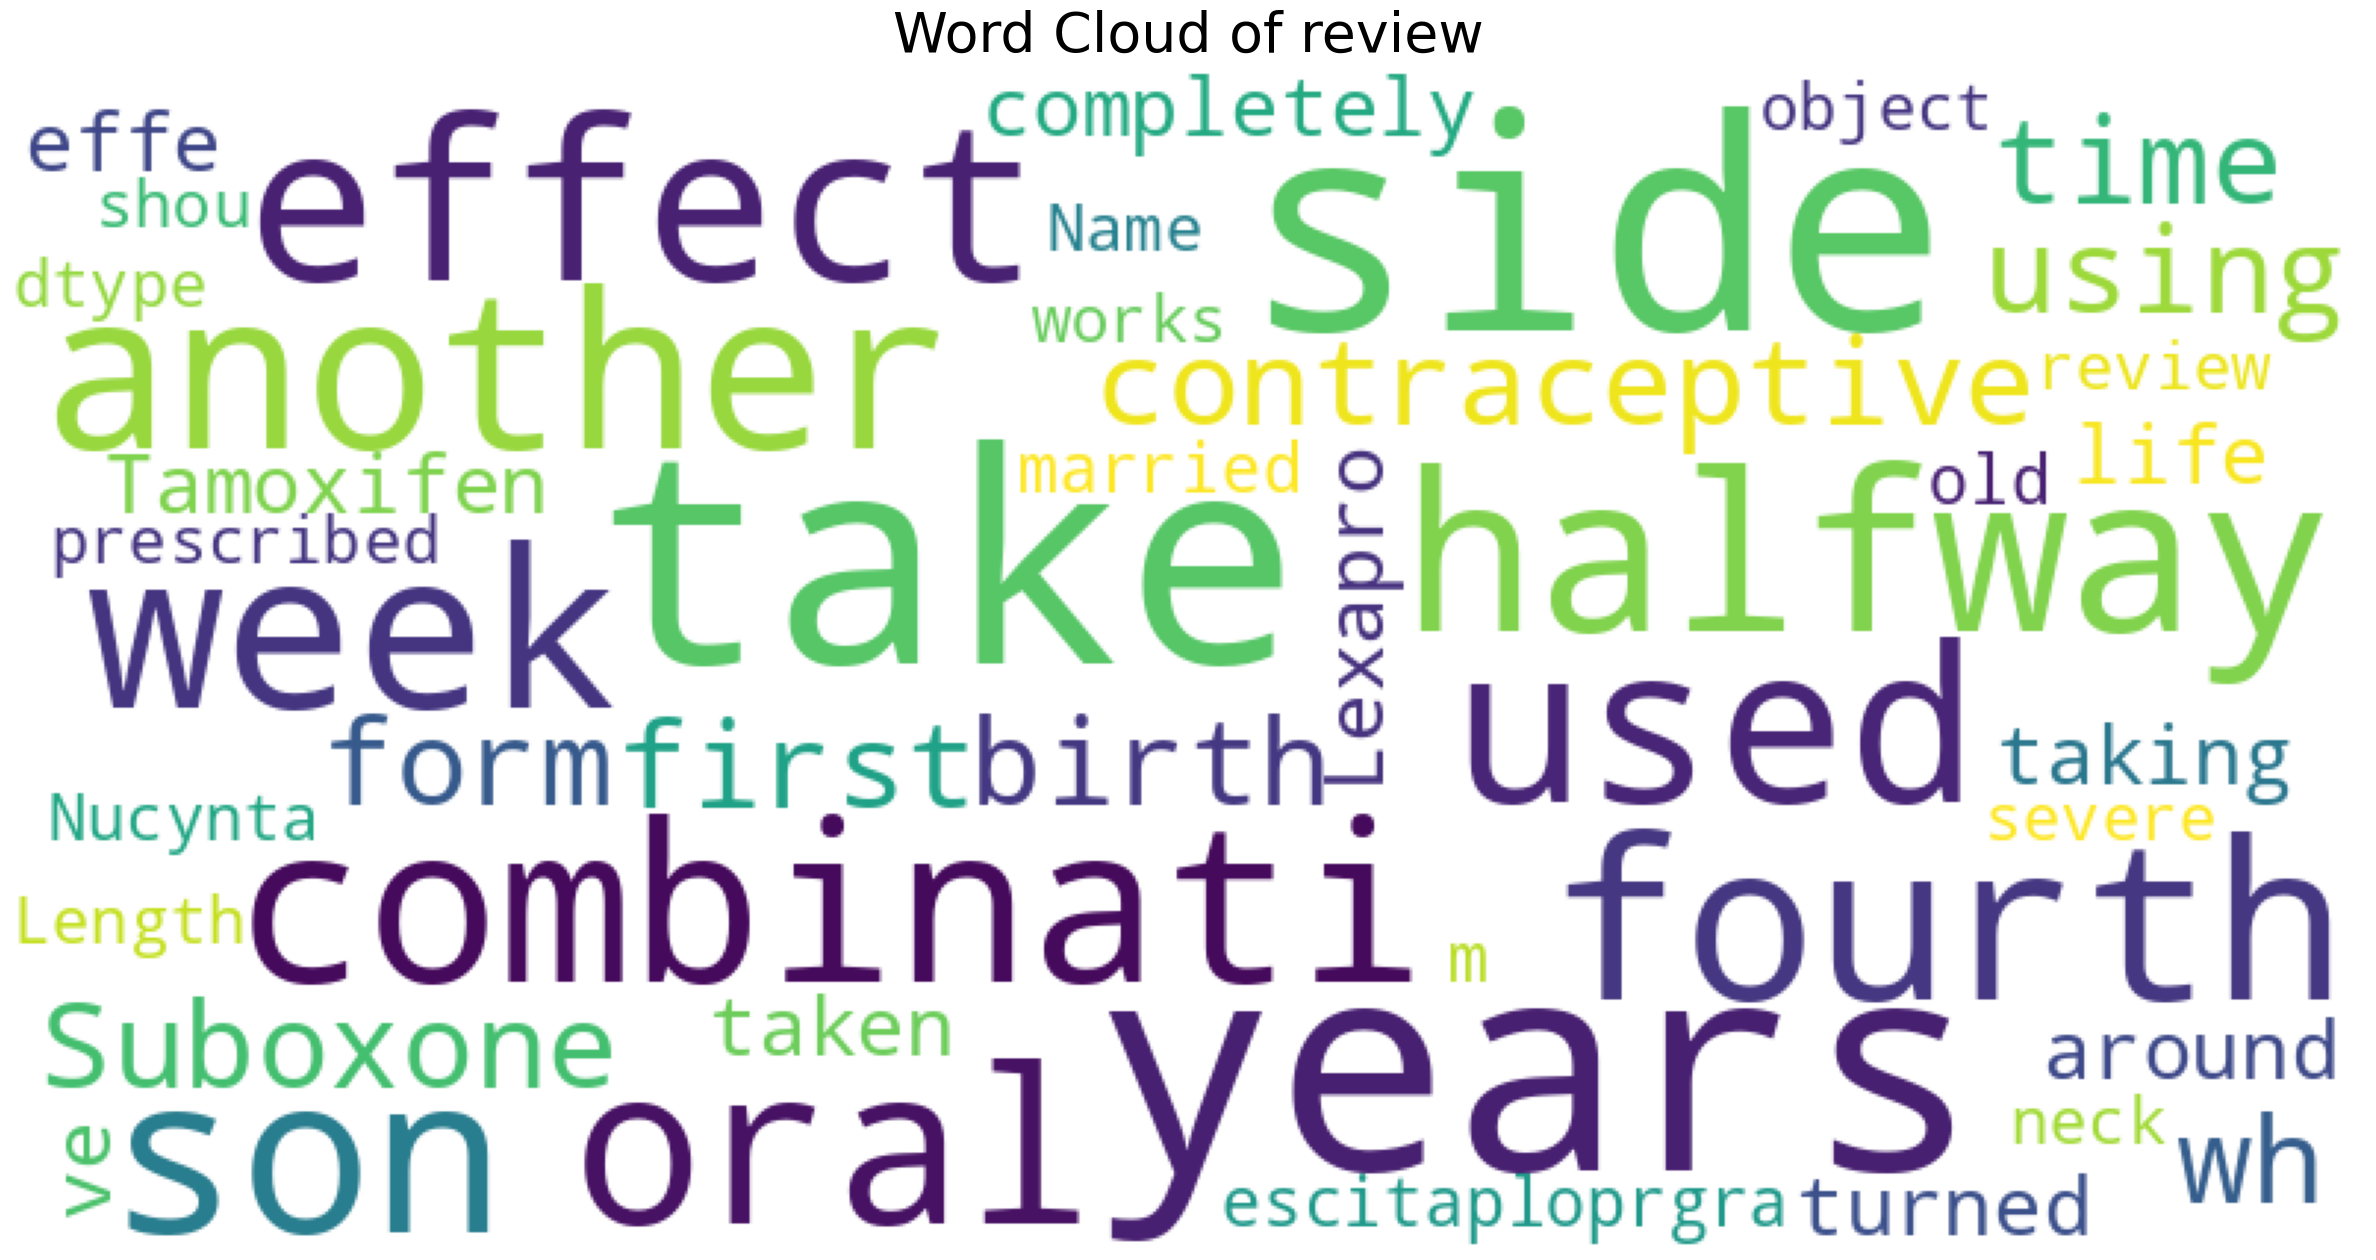

In [ ]:
#word cloud for the reviews with some custom stopwords.
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, mask=None, max_words=250, max_font_size=100, figure_size=(24.0,16.0),
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    width=800,
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black',
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

plot_wordcloud(df_all["review"], title="Word Cloud of review")

In [ ]:
# let's make a new column review sentiment
# If the rating is 5 or above(below), assign 'Sentiment' as positive(negative).

df_all.loc[(df_all['rating'] >= 5), 'Sentiment'] = 1
df_all.loc[(df_all['rating'] < 5), 'Sentiment'] = 0

df_all['Sentiment'].value_counts()

Sentiment
1.0    161491
0.0     53572
Name: count, dtype: int64

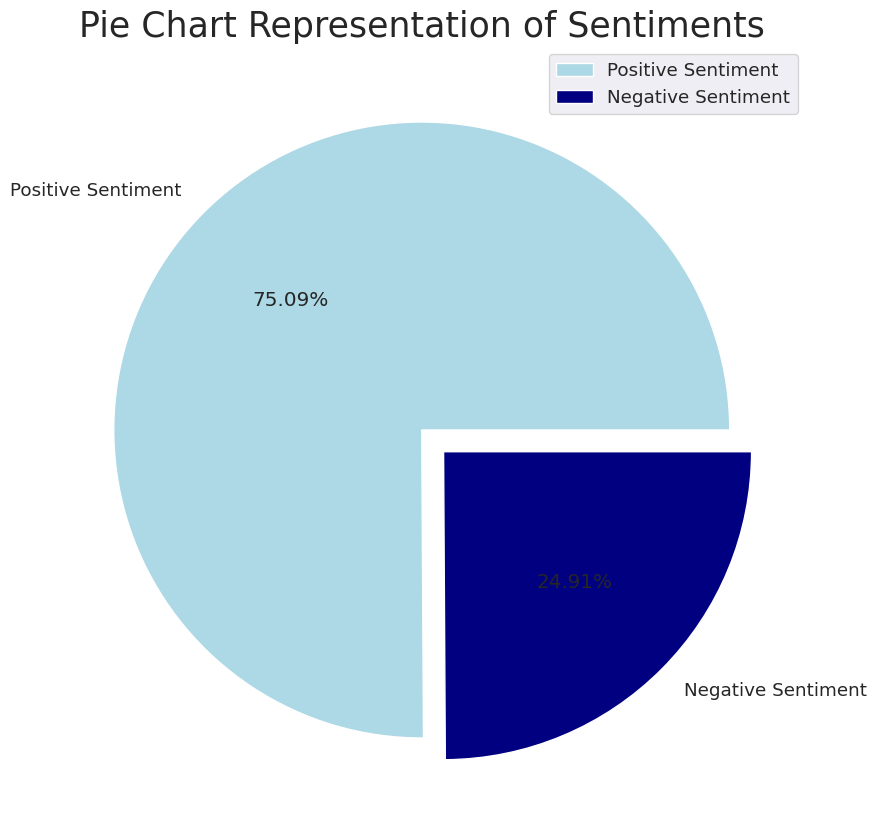

In [ ]:
# a pie chart to represent the sentiments of the patients

size = [161491, 53572]
colors = ['lightblue', 'navy']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

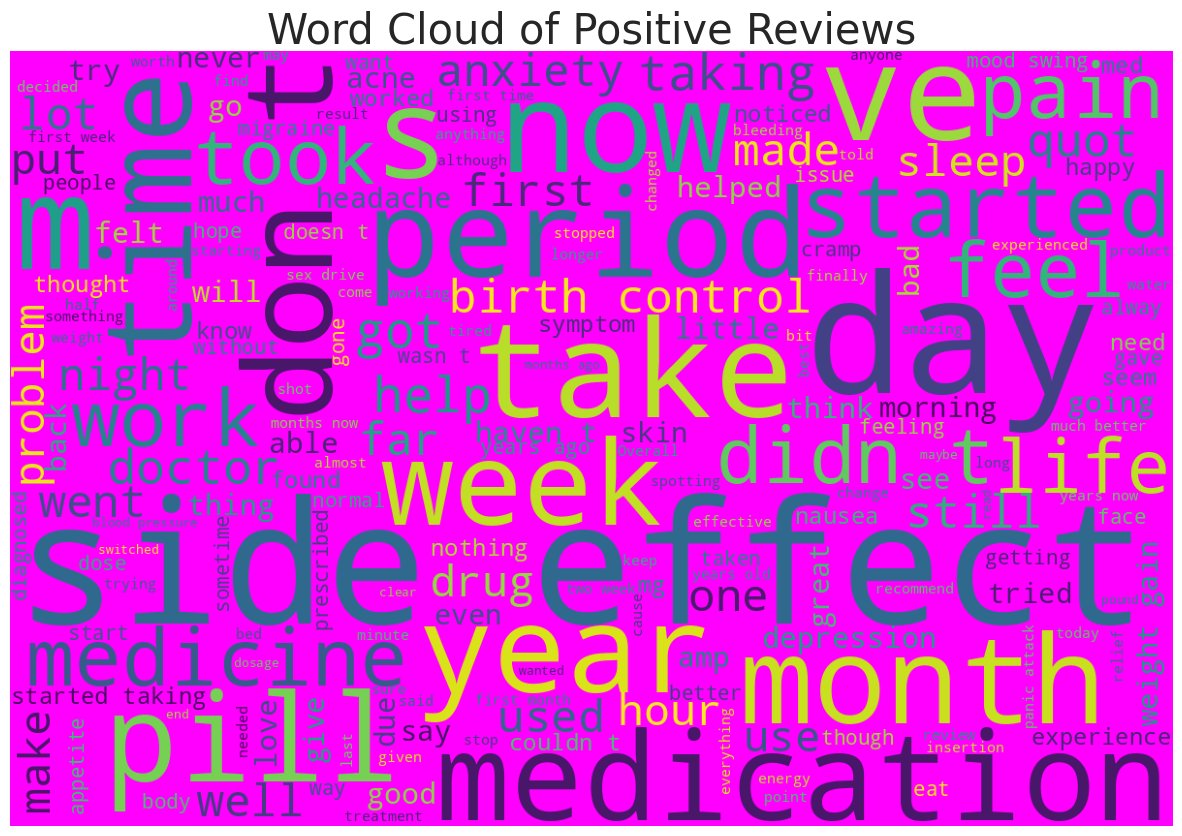

In [ ]:
# making Words cloud for the postive sentiments

positive_sentiments = " ".join([text for text in df_all['review'][df_all['Sentiment'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'magenta', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

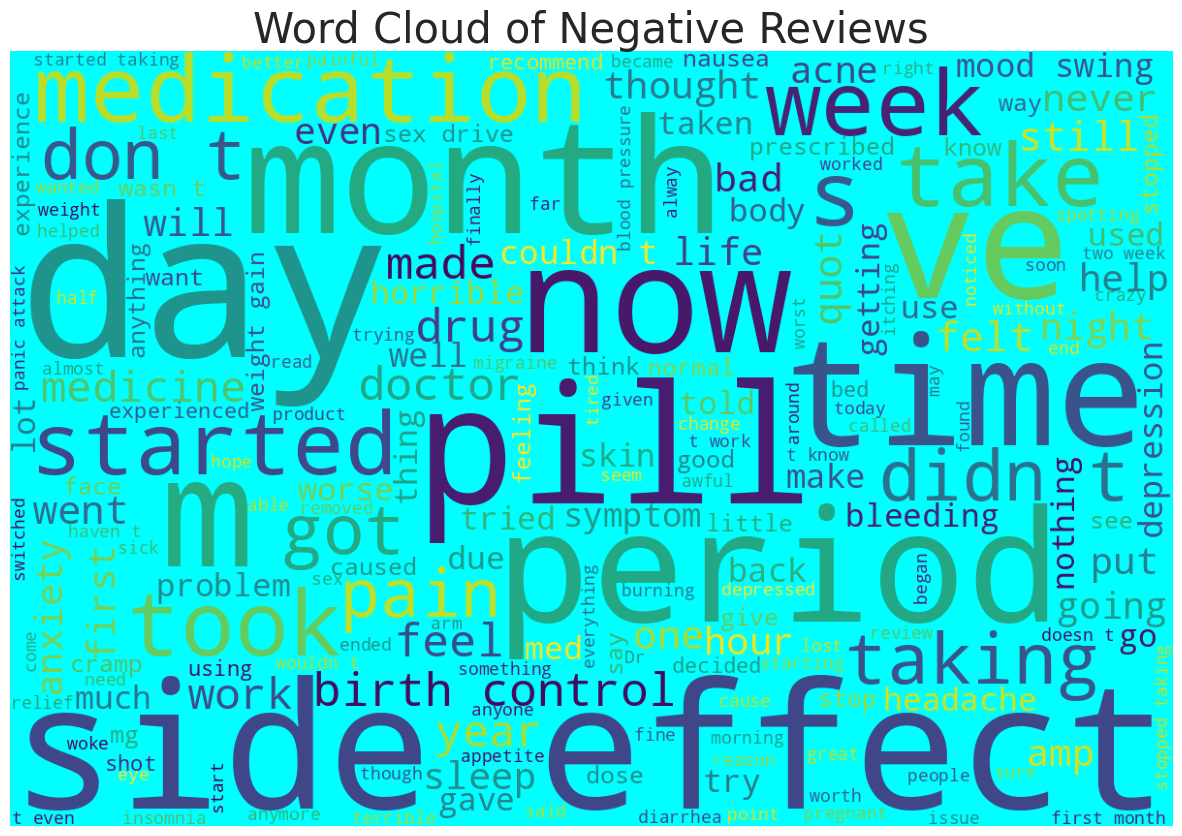

In [ ]:
# making wordscloud for the Negative sentiments

negative_sentiments = " ".join([text for text in df_all['review'][df_all['Sentiment'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'cyan', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
df_all.head()

uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9 2012-05-20   
1  "My son is halfway through his fourth week of ...       8 2010-04-27   
2  "I used to take another oral contraceptive, wh...       5 2009-12-14   
3  "This is my first time using any form of birth...       8 2015-11-03   
4  "Suboxone has completely turned my life around...       9 2016-11-27   

   usefulCount  Sentiment  
0           27        1.0  
1          192        1.0  
2           17        1.0  
3           10        1.0  
4           37        1.0

In [ ]:
from collections import defaultdict
df_all_6_10 = df_all[df_all["rating"]>5]
df_all_1_5 = df_all[df_all["rating"]<6]

In [ ]:
# Generate and compare word frequency plots for positive (6-10) and negative (1-5) reviews using 1-gram.

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import defaultdict
import pandas as pd


## Custom function for n-gram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## Custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation='h',
        marker=dict(color=color),
    )
    return trace

# Frequency dictionary and plotting for ratings 1 to 5
freq_dict_1_5 = defaultdict(int)
for sent in df_all_1_5["review"]:
    for word in generate_ngrams(sent):
        freq_dict_1_5[word] += 1
fd_sorted_1_5 = pd.DataFrame(sorted(freq_dict_1_5.items(), key=lambda x: x[1], reverse=True))
fd_sorted_1_5.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted_1_5.head(50), 'blue')

# Frequency dictionary and plotting for ratings 6 to 10
freq_dict_6_10 = defaultdict(int)
for sent in df_all_6_10["review"]:
    for word in generate_ngrams(sent):
        freq_dict_6_10[word] += 1
fd_sorted_6_10 = pd.DataFrame(sorted(freq_dict_6_10.items(), key=lambda x: x[1], reverse=True))
fd_sorted_6_10.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted_6_10.head(50), 'green')

# Creating two subplots
fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.1,
                    subplot_titles=["Frequent words of rating 1 to 5",
                                    "Frequent words of rating 6 to 10"])

fig.add_trace(trace0, row=1, col=1)
fig.add_trace(trace1, row=1, col=2)
fig.update_layout(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
fig.show()


In [ ]:
# Generate and compare word frequency plots for positive (6-10) and negative (1-5) reviews using bi-grams.

freq_dict = defaultdict(int)
for sent in df_all_1_5["review"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

freq_dict = defaultdict(int)
for sent in df_all_6_10["review"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming trace1 and trace2 are defined

# Creating two subplots
fig = make_subplots(
    rows=1, cols=2,
    vertical_spacing=0.04,
    horizontal_spacing=0.15,
    subplot_titles=["Frequent bigrams of rating 1 to 5",
                    "Frequent bigrams of rating 6 to 10"]
)

fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig.update_layout(
    height=1200,
    width=1000,
    paper_bgcolor='rgb(233,233,233)',
    title="Bigram Count Plots"
)
fig.show()

In [ ]:
# Generate and compare word frequency plots for positive (6-10) and negative (1-5) reviews using tri-grams.


freq_dict = defaultdict(int)
for sent in df_all_1_5["review"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'green')

freq_dict = defaultdict(int)
for sent in df_all_6_10["review"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'green')

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming trace1 and trace2 are defined and contain the trigram data

# Creating two subplots
fig = make_subplots(
    rows=1, cols=2,
    vertical_spacing=0.04,
    horizontal_spacing=0.15,
    subplot_titles=["Frequent trigrams of rating 1 to 5",
                    "Frequent trigrams of rating 6 to 10"]
)

fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig.update_layout(
    height=1200,
    width=1600,
    paper_bgcolor='rgb(233,233,233)',
    title="Trigram Count Plots"
)
fig.show()

In [ ]:
# Generate and compare word frequency plots for positive (6-10) and negative (1-5) reviews using 4-grams.

freq_dict = defaultdict(int)
for sent in df_all_1_5["review"]:
    for word in generate_ngrams(sent,4):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'red')

freq_dict = defaultdict(int)
for sent in df_all_6_10["review"]:
    for word in generate_ngrams(sent,4):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'red')

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# trace1 and trace2 are defined and contain the 4-gram data

# Creating two subplots
fig = make_subplots(
    rows=1, cols=2,
    vertical_spacing=0.04,
    horizontal_spacing=0.15,
    subplot_titles=["Frequent 4-grams of rating 1 to 5",
                    "Frequent 4-grams of rating 6 to 10"]
)

fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig.update_layout(
    height=1200,
    width=1600,
    paper_bgcolor='rgb(233,233,233)',
    title="4-grams Count Plots"
)
fig.show()

#We can see that 4-gram classifies emotions much betther than grams. Therefore, 4-gram was used to build deep learning model.

In [ ]:
df_all.head()

uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9 2012-05-20   
1  "My son is halfway through his fourth week of ...       8 2010-04-27   
2  "I used to take another oral contraceptive, wh...       5 2009-12-14   
3  "This is my first time using any form of birth...       8 2015-11-03   
4  "Suboxone has completely turned my life around...       9 2016-11-27   

   usefulCount  Sentiment  
0           27        1.0  
1          192        1.0  
2           17        1.0  
3           10        1.0  
4           37        1.0

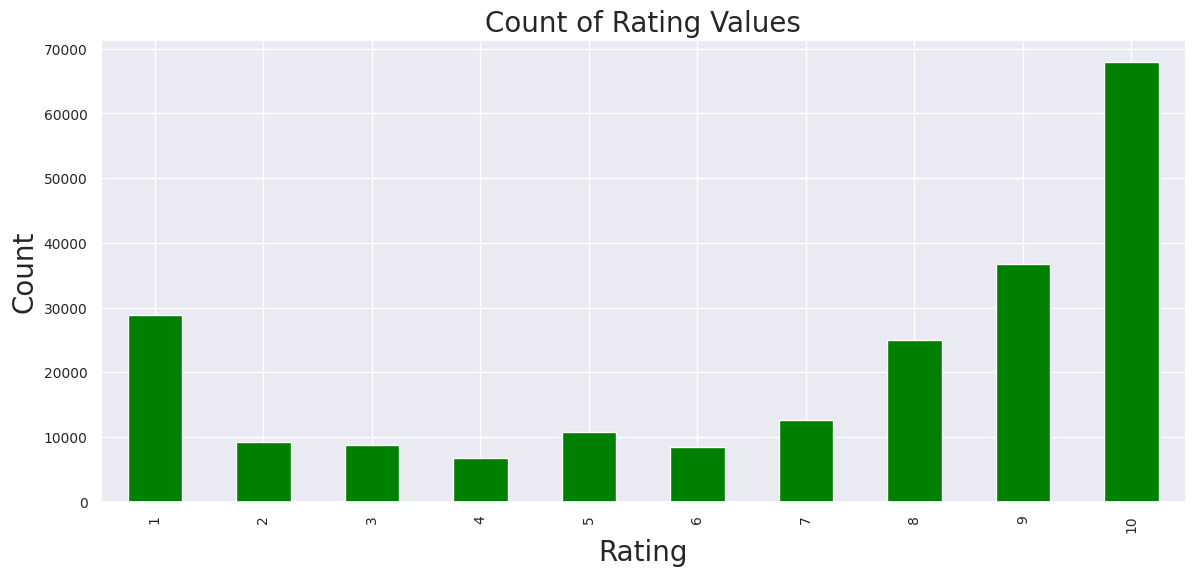

In [ ]:
rating = df_all['rating'].value_counts().sort_index()  # Sort by index to keep ratings in order
rating.plot(kind="bar", figsize=(14, 6), fontsize=10, color="green")
plt.xlabel("Rating", fontsize=20)  # Set x-axis label to "Rating"
plt.ylabel("Count", fontsize=20)  # Set y-axis label to "Count"
plt.title("Count of Rating Values", fontsize=20)
plt.show()

#Patients rate 10, 9, 1, 8 a lot more meaning their reactions are extreme and a majority of the time positive.

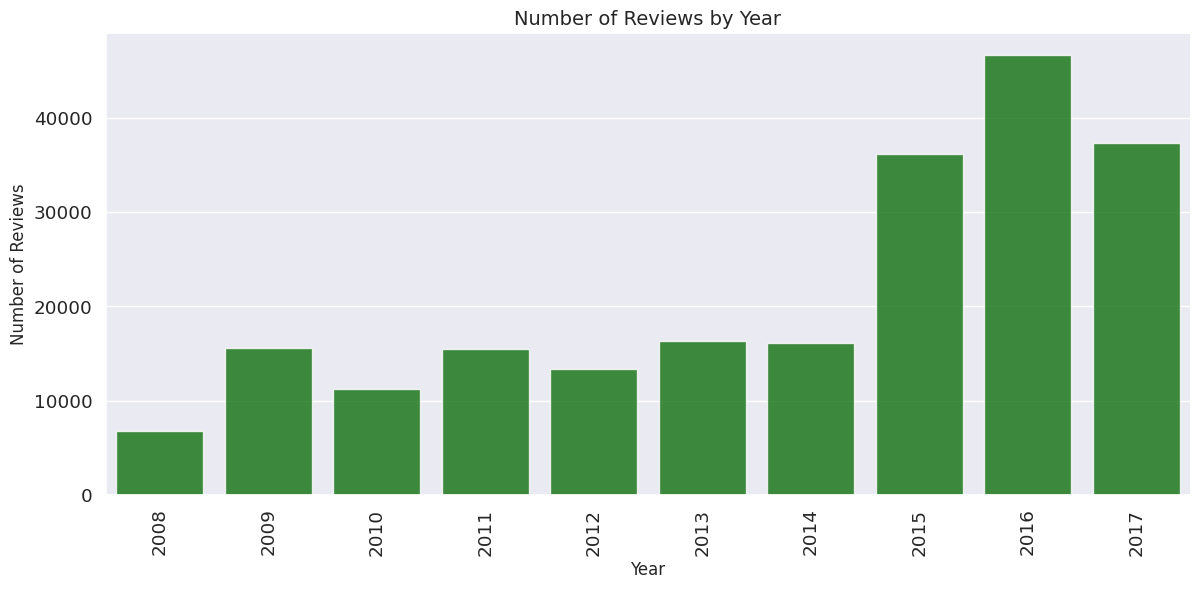

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cnt_srs = df_all['date'].dt.year.value_counts()
cnt_srs = cnt_srs.sort_index()

plt.figure(figsize=(14, 6))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color='green')  # Use x and y parameters
plt.xticks(rotation='vertical')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)  # Added label for y-axis
plt.title("Number of Reviews by Year", fontsize=14)
plt.show()

#The number of reviews increased significantly from 2014, peaking in 2016, before declining in 2017.

Text(0.5, 1.0, 'Mean rating in year')

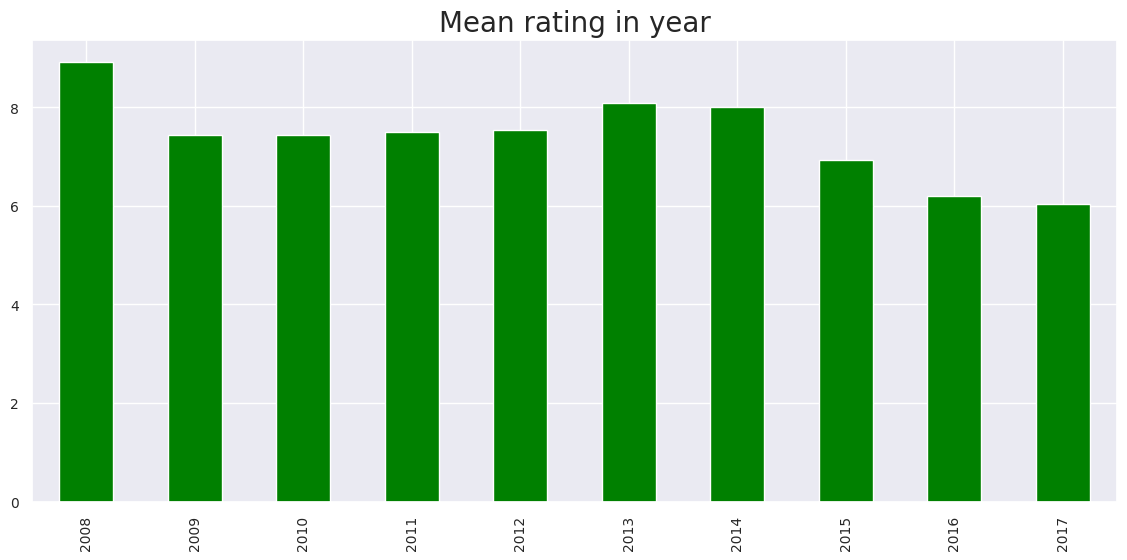

In [ ]:
df_all['year'] = df_all['date'].dt.year
rating = df_all.groupby('year')['rating'].mean()
rating.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Mean rating in year", fontsize = 20)

#increase in the number of reviews along the years normalized the ratings

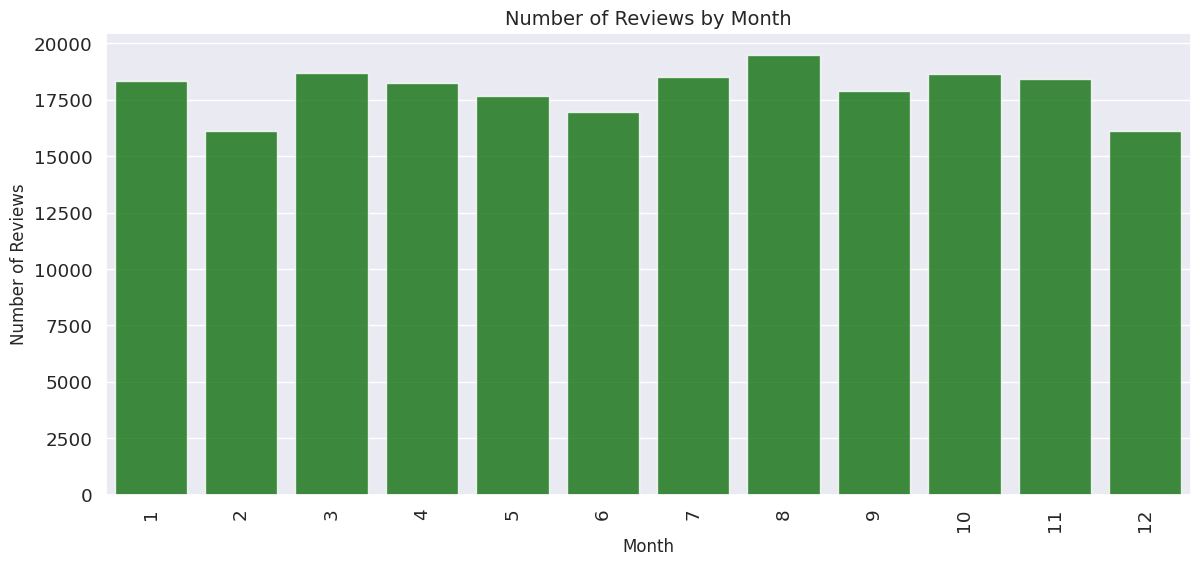

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_all is already defined and contains the 'date' column
cnt_srs = df_all['date'].dt.month.value_counts()
cnt_srs = cnt_srs.sort_index()

plt.figure(figsize=(14, 6))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color='green')  # Use x and y parameters
plt.xticks(rotation='vertical')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)  # Added label for y-axis
plt.title("Number of Reviews by Month", fontsize=14)
plt.show()

#Interestingly, the average rating differed by year but it is similar by month.

Text(0.5, 1.0, 'Mean rating in month')

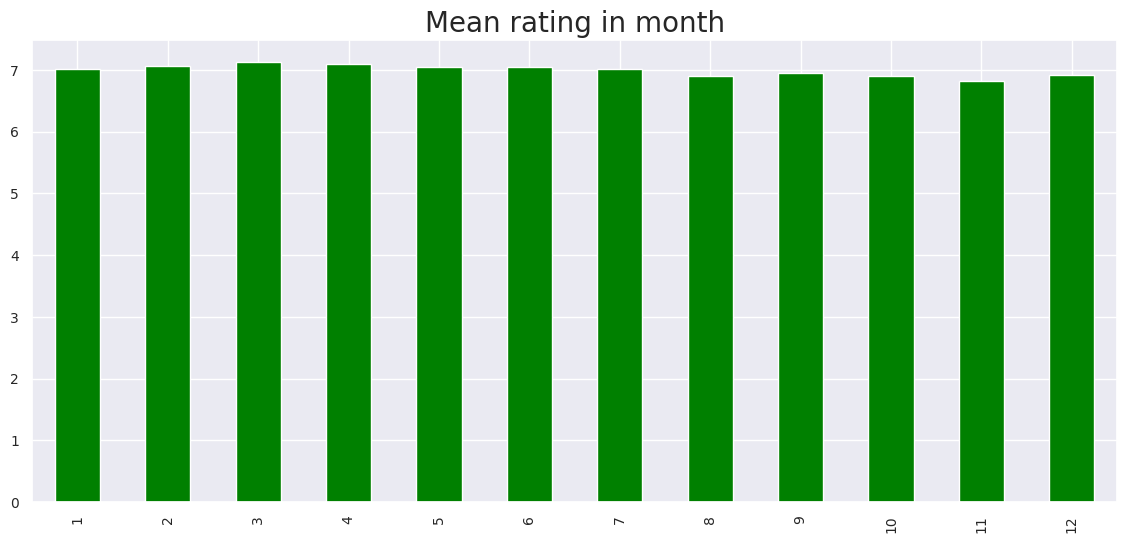

In [ ]:
df_all['month'] = df_all['date'].dt.month
rating = df_all.groupby('month')['rating'].mean()
rating.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Mean rating in month", fontsize = 20)

Text(0.5, 1.0, 'Mean rating in day')

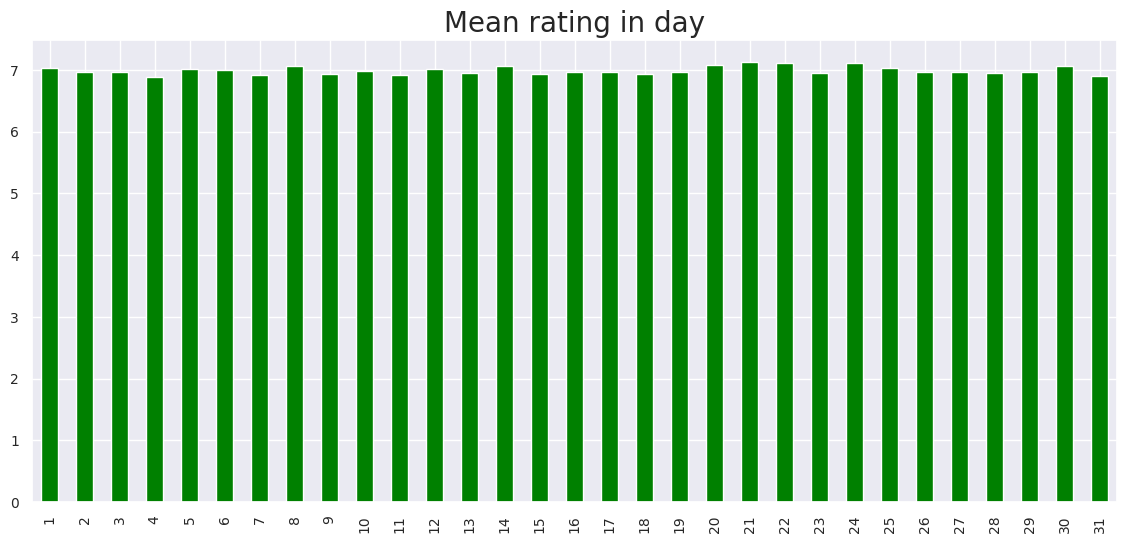

In [ ]:
#We checked maybe the day of the week affected the ratings like the salary day, but it did not make much difference.

df_all['day'] = df_all['date'].dt.day
rating = df_all.groupby('day')['rating'].mean()
rating.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Mean rating in day", fontsize = 20)

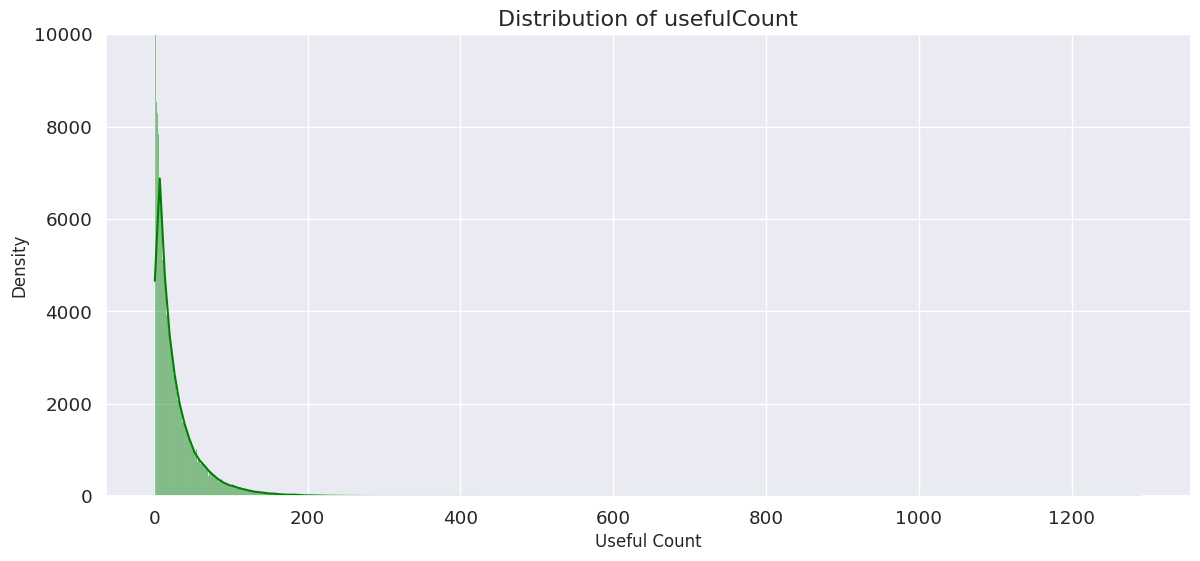

In [ ]:
plt.figure(figsize=(14, 6))
sns.histplot(df_all["usefulCount"].dropna(), color="green", kde=True)  # Adjust bin size for more detail
plt.xlabel("Useful Count", fontsize=12)  # Adding x-axis label
plt.ylabel("Density", fontsize=12)       # Adding y-axis label for clarity
plt.title("Distribution of usefulCount", fontsize=16)

# Limiting y-axis to 0-10000
plt.ylim(0, 10000)

plt.show()
#the more people read the review no matter their contents are good or bad, which makes the usefulcount very high.
#we normalize it by conditions, considering people's accessibility.

In [ ]:
df_all["usefulCount"].describe()

count    215063.000000
mean         28.001004
std          36.346069
min           0.000000
25%           6.000000
50%          16.000000
75%          36.000000
max        1291.000000
Name: usefulCount, dtype: float64

Text(0.5, 1.0, 'Total Missing Value ')

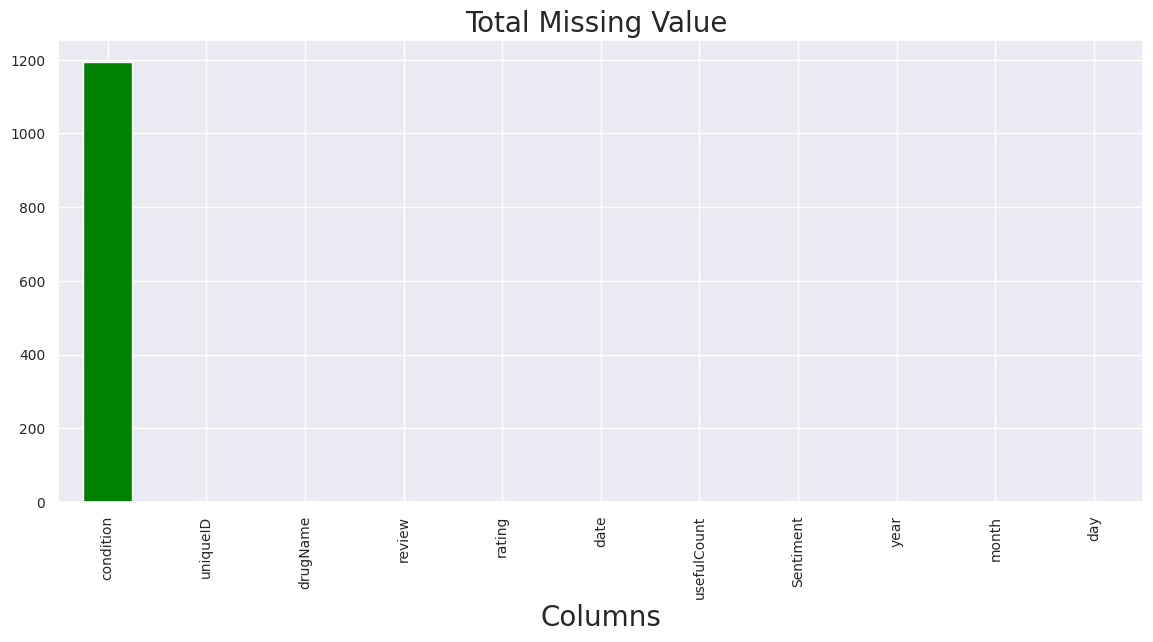

In [ ]:

percent = (df_all.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (14,6), fontsize = 10, color='green')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)

In [ ]:
print("Missing value (%):", 1200/df_all.shape[0] *100)
#We will delete this because the percentage is lower than 1%.

Missing value (%): 0.5579760349292998


In [ ]:
df_all.head()

uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9 2012-05-20   
1  "My son is halfway through his fourth week of ...       8 2010-04-27   
2  "I used to take another oral contraceptive, wh...       5 2009-12-14   
3  "This is my first time using any form of birth...       8 2015-11-03   
4  "Suboxone has completely turned my life around...       9 2016-11-27   

   usefulCount  Sentiment  year  month  day  
0           27        1.0  2012      5   20  
1          192        1.0  2010      4   27  
2           17        1.0  2009     12   14  
3           10        1.0  2015     11    3  
4           37        1.0  2016     11   27

In [ ]:
# Data Preprocessing

Text(0.5, 1.0, 'Total Missing Value ')

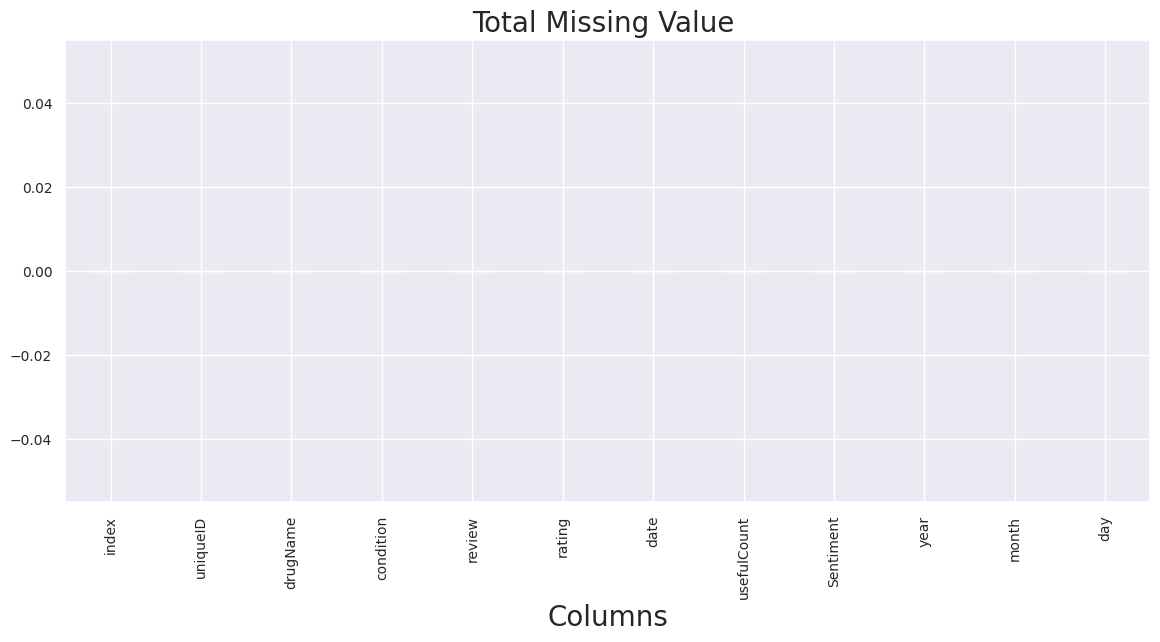

In [ ]:
# df_train = df_train.dropna(axis=0)
df_all = df_all.dropna(axis=0).reset_index()
# df_all = pd.concat([df_train,df_test]).reset_index()
# del df_all['index']
percent = (df_all.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (14,6), fontsize = 10, color='green')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)

#Missing Values Removed

In [ ]:
# removing  rows where </span> is present i condition column
all_list = set(df_all.index)
span_list = []
for i,j in enumerate(df_all['condition']):
    if '</span>' in j:
        span_list.append(i)

new_idx = all_list.difference(set(span_list))
df_all = df_all.iloc[list(new_idx)].reset_index()
del df_all['index']

Text(0.5, 1.0, 'Bottom20 : The number of drugs per condition.')

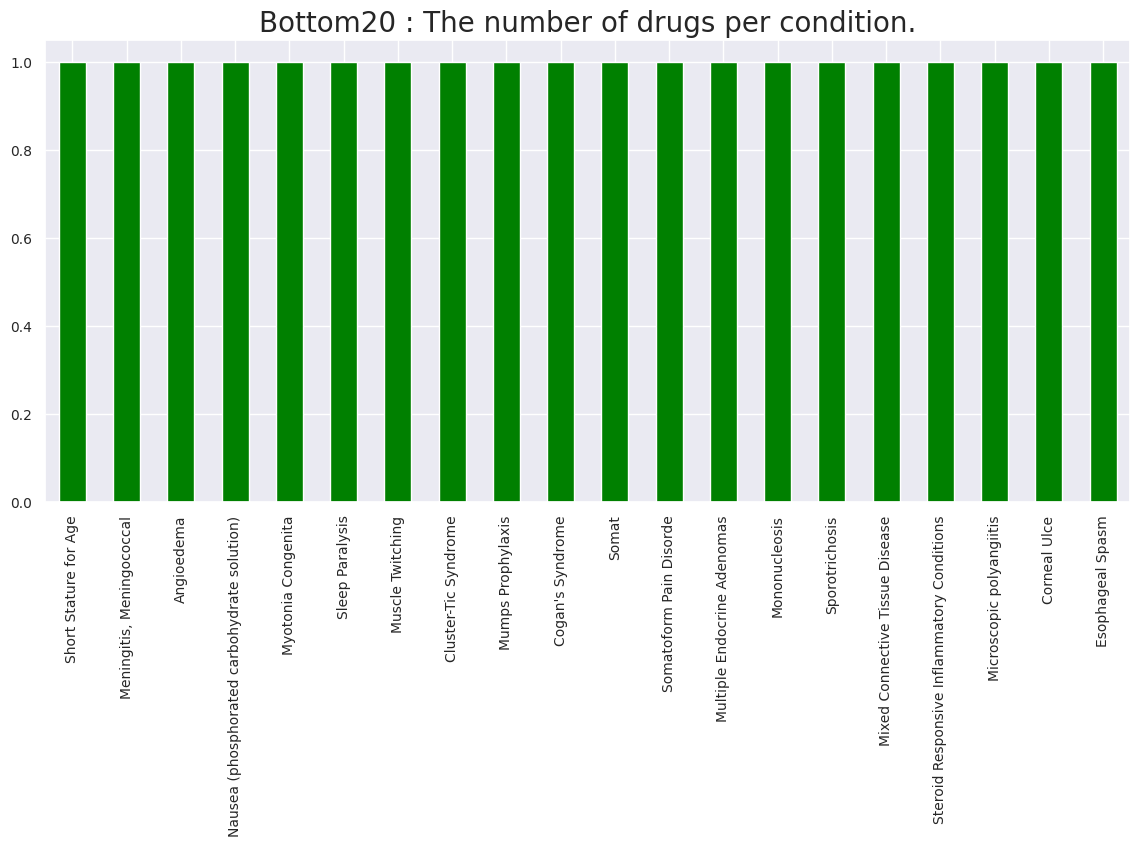

In [ ]:

condition_dn = df_all.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)

condition_dn[condition_dn.shape[0]-20:condition_dn.shape[0]].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Bottom20 : The number of drugs per condition.", fontsize = 20)

In [ ]:
# removing the condition which have only one review
df_condition = df_all.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
df_condition = pd.DataFrame(df_condition).reset_index()
df_condition.tail(20)

condition  drugName
816                        Short Stature for Age         1
817                    Meningitis, Meningococcal         1
818                                   Angioedema         1
819  Nausea (phosphorated carbohydrate solution)         1
820                           Myotonia Congenita         1
821                              Sleep Paralysis         1
822                             Muscle Twitching         1
823                         Cluster-Tic Syndrome         1
824                            Mumps Prophylaxis         1
825                             Cogan's Syndrome         1
826                                        Somat         1
827                      Somatoform Pain Disorde         1
828                  Multiple Endocrine Adenomas         1
829                                Mononucleosis         1
830                               Sporotrichosis         1
831              Mixed Connective Tissue Disease         1
832   Steroid Responsive Inflammatory Conditions         1
833                     Microscopic polyangiitis         1
834                                 Corneal Ulce         1
835                             Esophageal Spasm         1

In [ ]:
df_condition_1 = df_condition[df_condition['drugName']==1].reset_index()
df_condition_1['condition'][0:10]

0              Wound Cleansing
1            Aggressive Behavi
2     Yellow Fever Prophylaxis
3         Tuberculosis, Active
4           Hyperbilirubinemia
5                Hydrocephalus
6                Hypercalcemia
7         Gestational Diabetes
8            Ectopic Pregnancy
9    unctional Gastric Disorde
Name: condition, dtype: object

In [ ]:
all_list = set(df_all.index)
condition_list = []
for i,j in enumerate(df_all['condition']):
    for c in list(df_condition_1['condition']):
        if j == c:
            condition_list.append(i)

new_idx = all_list.difference(set(condition_list))
df_all = df_all.iloc[list(new_idx)].reset_index()
del df_all['index']

# Remove entries for conditions with only one unique drug.

Processing the reviews

In [ ]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df_all.head()

level_0  uniqueID                  drugName                     condition  \
0        0    206461                 Valsartan  Left Ventricular Dysfunction   
1        1     95260                Guanfacine                          ADHD   
2        2     92703                    Lybrel                 Birth Control   
3        3    138000                Ortho Evra                 Birth Control   
4        4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9 2012-05-20   
1  "My son is halfway through his fourth week of ...       8 2010-04-27   
2  "I used to take another oral contraceptive, wh...       5 2009-12-14   
3  "This is my first time using any form of birth...       8 2015-11-03   
4  "Suboxone has completely turned my life around...       9 2016-11-27   

   usefulCount  Sentiment  year  month  day  
0           27        1.0  2012      5   20  
1          192        1.0  2010      4   27  
2           17        1.0  2009     12   14  
3           10        1.0  2015     11    3  
4           37        1.0  2016     11   27

In [ ]:
stops = set(stopwords.words('english'))
#stops

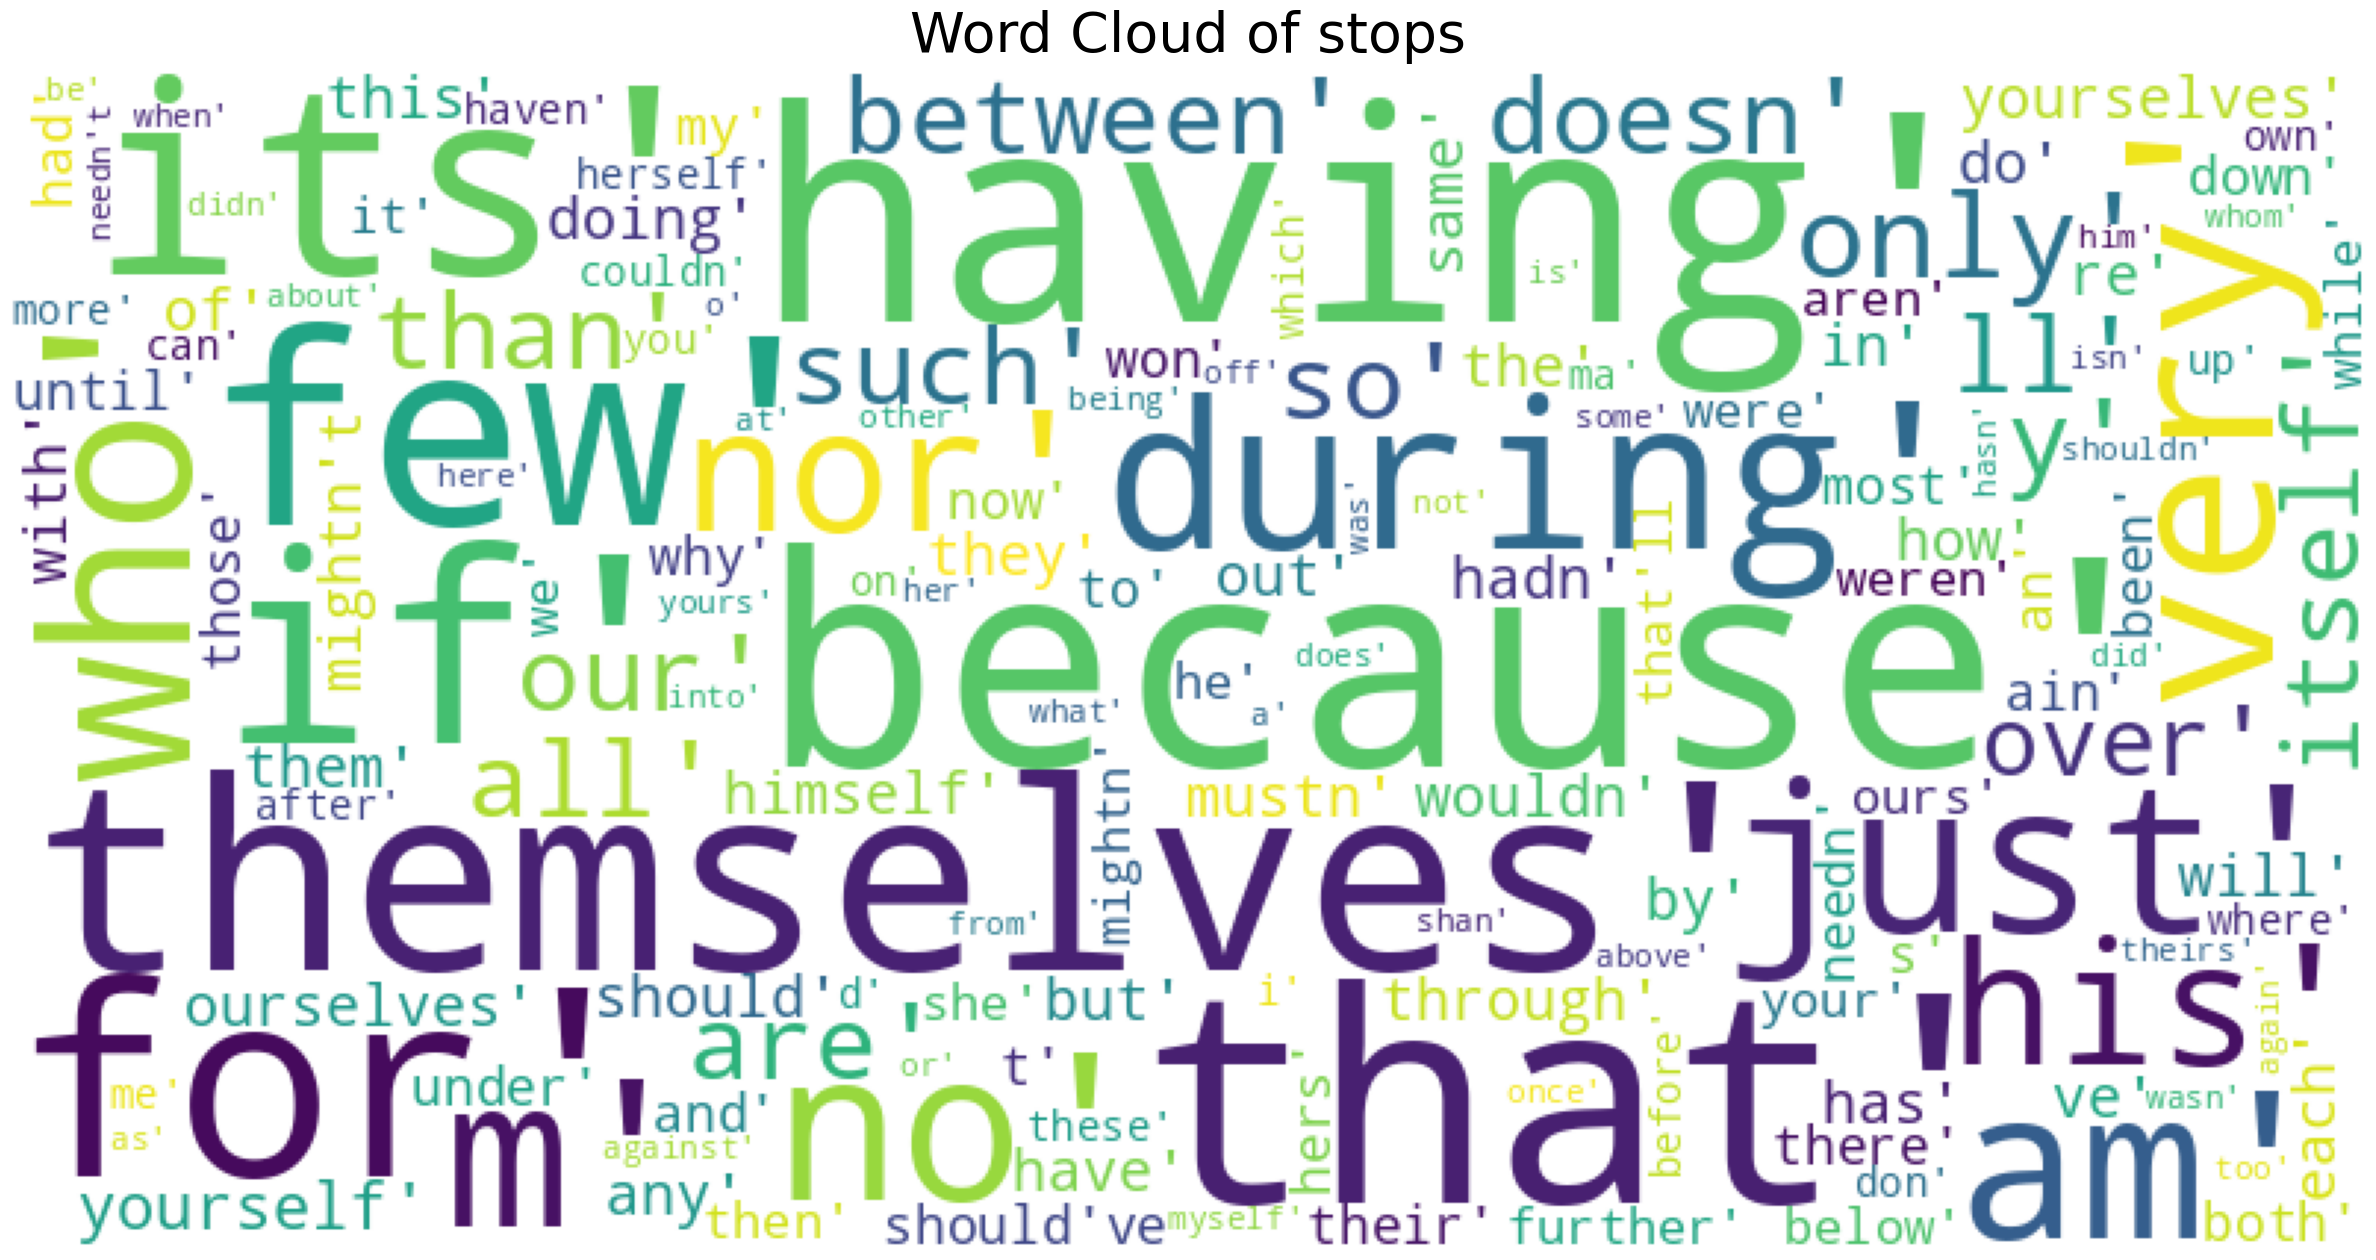

In [ ]:
#word cloud of stopwords
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0),
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    width=800,
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black',
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

plot_wordcloud(stops, title="Word Cloud of stops")



In [ ]:
not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stops.remove(i)

#There might be many words that include not, like needn't. These words are important parts of emotional analysis, so we will remove them from stopwords.

In [ ]:
df_all.head()

level_0  uniqueID                  drugName                     condition  \
0        0    206461                 Valsartan  Left Ventricular Dysfunction   
1        1     95260                Guanfacine                          ADHD   
2        2     92703                    Lybrel                 Birth Control   
3        3    138000                Ortho Evra                 Birth Control   
4        4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9 2012-05-20   
1  "My son is halfway through his fourth week of ...       8 2010-04-27   
2  "I used to take another oral contraceptive, wh...       5 2009-12-14   
3  "This is my first time using any form of birth...       8 2015-11-03   
4  "Suboxone has completely turned my life around...       9 2016-11-27   

   usefulCount  Sentiment  year  month  day  
0           27        1.0  2012      5   20  
1          192        1.0  2010      4   27  
2           17        1.0  2009     12   14  
3           10        1.0  2015     11    3  
4           37        1.0  2016     11   27

In [ ]:
from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import lightgbm as lgb

import pandas as pd
from bs4 import BeautifulSoup
import re
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Keras imports
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




In [ ]:
df_all.head()

level_0  uniqueID                  drugName                     condition  \
0        0    206461                 Valsartan  Left Ventricular Dysfunction   
1        1     95260                Guanfacine                          ADHD   
2        2     92703                    Lybrel                 Birth Control   
3        3    138000                Ortho Evra                 Birth Control   
4        4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9 2012-05-20   
1  "My son is halfway through his fourth week of ...       8 2010-04-27   
2  "I used to take another oral contraceptive, wh...       5 2009-12-14   
3  "This is my first time using any form of birth...       8 2015-11-03   
4  "Suboxone has completely turned my life around...       9 2016-11-27   

   usefulCount  Sentiment  year  month  day  
0           27        1.0  2012      5   20  
1          192        1.0  2010      4   27  
2           17        1.0  2009     12   14  
3           10        1.0  2015     11    3  
4           37        1.0  2016     11   27

In [ ]:
#cleaning the reviews

from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import pandas as pd

# Initialize the stemmer and stopwords list once outside the function for efficiency
stemmer = SnowballStemmer('english')

def review_to_words(raw_review):
    """
    Preprocesses a raw review string by removing HTML tags, non-letter characters,
    stopwords, and applying stemming. Returns a cleaned, single string of processed words.
    """
    #Remove HTML tags using BeautifulSoup
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()

    # Convert to lowercase
    lower = review_text.lower()

    # Replace common HTML codes
    lower = re.sub("&#039;", "", lower)

    # Remove special characters, non-ASCII characters, extra spaces, and trailing/leading whitespace
    lower = re.sub(r'[^\w\d\s]', ' ', lower)
    lower = re.sub(r'[^\x00-\x7F]+', ' ', lower)
    lower = re.sub(r'\s+', ' ', lower).strip()
    lower = re.sub(r'\.{2,}', ' ', lower)

    # Remove stopwords and apply stemming
    words = lower.split()
    meaningful_words = [stemmer.stem(word) for word in words if word not in stops]

    # Join the words back into a single string separated by spaces
    return ' '.join(meaningful_words)


# Measure execution time and apply the function to the 'review' column in df_all
%time df_all['review_clean'] = df_all['review'].apply(review_to_words)


<ipython-input-60-69efd07561cb>:18: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



CPU times: user 3min 6s, sys: 911 ms, total: 3min 7s
Wall time: 3min 10s


In [ ]:
df_all.head()

level_0  uniqueID                  drugName                     condition  \
0        0    206461                 Valsartan  Left Ventricular Dysfunction   
1        1     95260                Guanfacine                          ADHD   
2        2     92703                    Lybrel                 Birth Control   
3        3    138000                Ortho Evra                 Birth Control   
4        4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9 2012-05-20   
1  "My son is halfway through his fourth week of ...       8 2010-04-27   
2  "I used to take another oral contraceptive, wh...       5 2009-12-14   
3  "This is my first time using any form of birth...       8 2015-11-03   
4  "Suboxone has completely turned my life around...       9 2016-11-27   

   usefulCount  Sentiment  year  month  day  \
0           27        1.0  2012      5   20   
1          192        1.0  2010      4   27   
2           17        1.0  2009     12   14   
3           10        1.0  2015     11    3   
4           37        1.0  2016     11   27   

                                        review_clean  
0    no side effect take combin bystol 5 mg fish oil  
1  son halfway fourth week intuniv becam concern ...  
2  use take anoth oral contracept 21 pill cycl ha...  
3  first time use form birth control glad went pa...  
4  suboxon complet turn life around feel healthie...

Model

Deep Learning Model

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.utils import Sequence
import tensorflow as tf

# splitting training and testing data 70%-30%
# df_all is the dataframe that contains 'review_clean' and 'sentiment'
df_train, df_test = train_test_split(df_all, test_size=0.3, random_state=42)

# set up the CountVectorizer
vectorizer = CountVectorizer(analyzer='word',
                             tokenizer=None,
                             preprocessor=None,
                             stop_words=None,
                             min_df=2,
                             ngram_range=(4, 4),
                             max_features=20000)

# Fitting the vectorizer on the clean reviews on the training data
vectorizer.fit(df_train['review_clean'])

# Defining the Dataset Generator Class
class TextDatasetGenerator(Sequence):
    def __init__(self, data, labels, vectorizer, batch_size=64, shuffle=True):
        self.data = data
        self.labels = labels
        self.vectorizer = vectorizer
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.data))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.data) / self.batch_size))

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __getitem__(self, index):
        batch_indexes = self.indexes[index * self.batch_size: (index + 1) * self.batch_size]
        batch_data = [self.data.iloc[i] for i in batch_indexes]
        batch_labels = self.labels.iloc[batch_indexes]

        # Transform the batch data using the fitted vectorizer
        batch_features = self.vectorizer.transform(batch_data)

        # Convert dense matrix to sparse tensor
        sparse_tensor = tf.sparse.from_dense(batch_features.toarray())

        return sparse_tensor, batch_labels

# Initialize the Dataset Generators
train_generator = TextDatasetGenerator(df_train['review_clean'], df_train['Sentiment'], vectorizer)
test_generator = TextDatasetGenerator(df_test['review_clean'], df_test['Sentiment'], vectorizer)

# Path to save/load the model
model_path = '/content/drive/MyDrive/drug_review_dataset_drugs_com/deep_sentiment_model.h5'

# Step 5: Define the Model (only if not already trained)
if os.path.exists(model_path):
    # Load the model if it exists
    model = load_model(model_path)
    print("Model loaded from disk.")
else:
    #training the model
    model = Sequential([
        Dense(200, input_shape=(20000,)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),
        Dense(300),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),
        Dense(100, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    #Compile the Model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()

    # Train the Model using the Generator
    hist = model.fit(train_generator, epochs=10, verbose=1)

    # Save the trained model
    model.save(model_path)
    print("Model saved to disk.")

  # Plot Training Loss and Accuracy
    import matplotlib.pyplot as plt

    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    loss_ax.set_ylim([0.0, 1.0])
    acc_ax.set_ylim([0.0, 1.0])

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuracy')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')

    plt.show()

# Evaluate the Model on the Test Set
loss_and_metrics = model.evaluate(test_generator, batch_size=32)
print('Test loss and metrics:', loss_and_metrics)


Model loaded from disk.
  3/994 ━━━━━━━━━━━━━━━━━━━━ 46s 47ms/step - accuracy: 0.7023 - loss: 0.8069   

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



994/994 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.7086 - loss: 0.8341
Test loss and metrics: [0.8346543908119202, 0.7058444619178772]


In [ ]:
# Get predictions on the test set
predictions = model.predict(test_generator)
sub_preds_deep = predictions

# Convert probabilities to class labels (0 or 1) based on a threshold of 0.5
predicted_labels = (predictions > 0.5).astype(int)

# we can now compare the predicted labels to the true labels from the test set
true_labels = df_test['Sentiment'].values

994/994 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step


Confusion Matrix:
[[ 1332 14601]
 [ 4104 43579]]
Accuracy: 0.71
F1 Score: 0.65


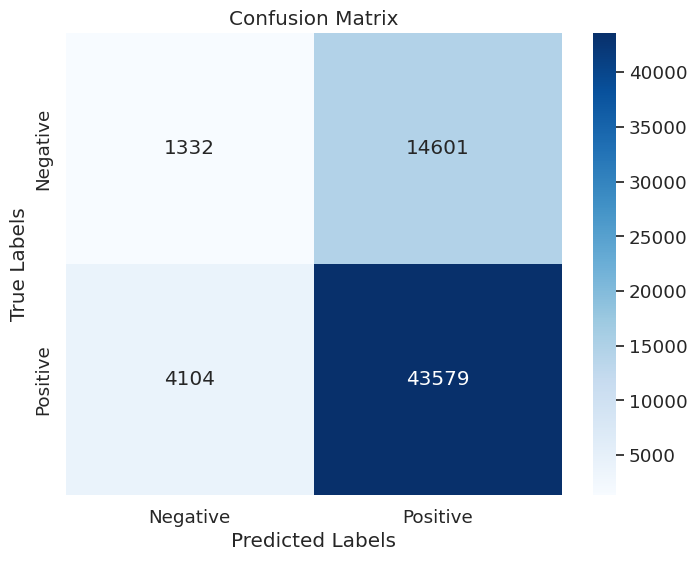

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# F1 Score
f1 = f1_score(true_labels, predicted_labels, average='weighted')  # Adjust 'average' as needed
print(f"F1 Score: {f1:.2f}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Lightgbm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, accuracy_score
from lightgbm import early_stopping

#

target = df_train['Sentiment']
feats = ['usefulCount']

sub_preds = np.zeros(df_test.shape[0])

# Split the data into train and validation sets
trn_x, val_x, trn_y, val_y = train_test_split(df_train[feats], target, test_size=0.2, random_state=42)

feature_importance_df = pd.DataFrame()

# Initialize the classifier
clf = lgb.LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.05,
        num_leaves=30,
        subsample=0.9,
        max_depth=7,
        reg_alpha=0.1,
        reg_lambda=0.1,
        min_split_gain=0.01,
        min_child_weight=2,
        verbosity=-1,  # Use verbosity for logging, -1 to suppress output
)

# Fit the model with early stopping and evaluation set
clf.fit(trn_x, trn_y,
        eval_set=[(val_x, val_y)],
        # Evaluation metric (binary classification, logloss is common)
        callbacks=[early_stopping(stopping_rounds=100, verbose=100)],  # Use callbacks for early stopping
        )  # Set the verbosity level for training

# Predict using the trained model
sub_preds = clf.predict(df_test[feats])

# # Optionally, evaluate the model performance
# print("Confusion Matrix:")
# print(confusion_matrix(val_y, clf.predict(val_x)))
# print("Accuracy:", accuracy_score(val_y, clf.predict(val_x)))

# # Optionally, get feature importances if needed
# feature_importance_df['feature'] = trn_x.columns
# feature_importance_df['importance'] = clf.feature_importances_
# print("Feature Importances:")
# print(feature_importance_df)


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[76]	valid_0's binary_logloss: 0.530648


Confusion Matrix:
[[    0 15933]
 [    0 47683]]
Accuracy: 0.75
F1 Score: 0.86


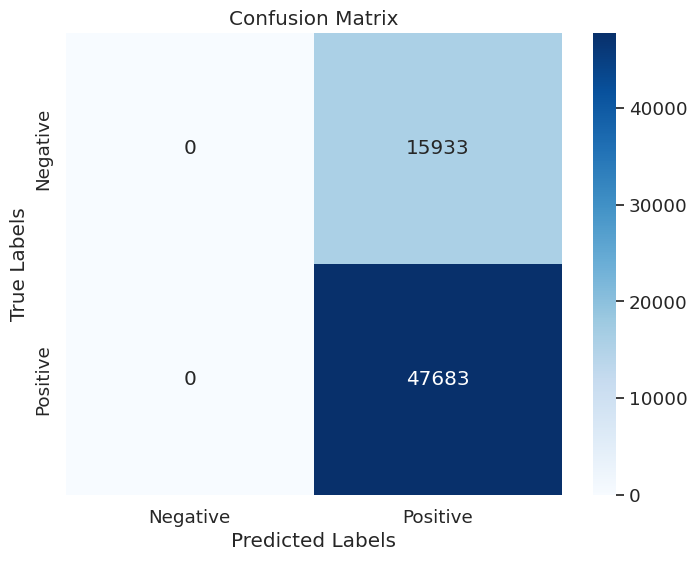

In [ ]:
solution = df_test['Sentiment']

# Confusion Matrix
cm = confusion_matrix(y_pred = sub_preds, y_true = solution)
print("Confusion Matrix:")
print(cm)

# Accuracy
accuracy = accuracy_score(sub_preds, solution)
print(f"Accuracy: {accuracy:.2f}")

# F1 Score
f1 = f1_score(sub_preds, solution, average='weighted')  # Adjust 'average' as needed
print(f"F1 Score: {f1:.2f}")


# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
del df_all

df_all = pd.concat([df_train, df_test], axis=0)

In [ ]:
df_all.shape

(212053, 13)

In [ ]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from tqdm import tqdm

In [ ]:
def sentiment(review):
    # Sentiment polarity of the reviews with progress tracking
    pol = []
    for i in tqdm(review, desc="Processing Reviews"):
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [ ]:
df_all['sentiment_value'] = sentiment(df_all['review'])

Processing Reviews: 100%|██████████| 212053/212053 [03:09<00:00, 1116.39it/s]


In [ ]:
df_all['sentiment_clean'] = sentiment(df_all['review_clean'])

Processing Reviews: 100%|██████████| 212053/212053 [01:47<00:00, 1970.09it/s]


In [ ]:
def review_basic_cleaning(review):
    # changing to lower case
    lower = review.str.lower()

    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "", regex=False)

    # Removing all the special characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]', ' ', regex=True)

    # Removing all the non-ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+', ' ', regex=True)

    # Removing leading and trailing whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+$', '', regex=True)

    # Replacing multiple spaces with a single space
    multiw_remove = whitespace_remove.str.replace(r'\s+', ' ', regex=True)

    # Replacing two or more dots with a single space
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ', regex=True)

    return dataframe


In [ ]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
df_all['review_clean_ss'] = review_basic_cleaning(df_all['review'])
df_all['sentiment_clean_ss'] = sentiment(df_all['review_clean_ss'])

Processing Reviews: 100%|██████████| 212053/212053 [02:42<00:00, 1307.18it/s]


In [ ]:

df_all.head()

level_0  uniqueID        drugName        condition  \
78050     78751     22170        Baclofen        Neuralgia   
20265     20456    167840      Eletriptan         Migraine   
152816   154156     90017       Risperdal           Autism   
47403     47829    186620  Desvenlafaxine      ibromyalgia   
57216     57729     92507     Ondansetron  Nausea/Vomiting   

                                                   review  rating       date  \
78050   "I have suffered with pain from lower back dis...       8 2015-07-05   
20265   "I have suffered from migraines for many years...      10 2009-06-04   
152816  "My son was recently perscribed this medicine....       8 2008-12-19   
47403   "I was diagnosed with Fibromyalgia approximate...      10 2009-10-22   
57216   "The only medication that really does the tric...      10 2015-03-09   

        usefulCount  Sentiment  year  month  day  \
78050            30        1.0  2015      7    5   
20265             8        1.0  2009      6    4   
152816           77        1.0  2008     12   19   
47403            60        1.0  2009     10   22   
57216            52        1.0  2015      3    9   

                                             review_clean  sentiment_value  \
78050   suffer pain lower back disk bulg sever year ne...         0.034611   
20265   suffer migrain mani year year mani test done t...         0.084848   
152816  son recent perscrib medicin posit effect behav...         0.113636   
47403   diagnos fibromyalgia approxim 5 year ago take ...         0.100000   
57216   medic realli trick prescrib twice due sever st...         0.228125   

        sentiment_clean                                    review_clean_ss  \
78050          0.117143  i have suffered with pain from lower back disk...   
20265          0.072222  i have suffered from migraines for many years ...   
152816         0.000000  my son was recently perscribed this medicine i...   
47403          0.109259  i was diagnosed with fibromyalgia approximatel...   
57216          0.187500  the only medication that really does the trick...   

        sentiment_clean_ss  
78050             0.034611  
20265             0.084848  
152816            0.113636  
47403             0.077273  
57216             0.212500

In [ ]:
import string

#Sentence length
df_all['count_sent']=df_all["review"].apply(lambda x: len(re.findall("\n",str(x)))+1)

#Word count in each review
df_all['count_word']=df_all["review_clean"].apply(lambda x: len(str(x).split()))

#Unique word count
df_all['count_unique_word']=df_all["review_clean"].apply(lambda x: len(set(str(x).split())))

#Letter count
df_all['count_letters']=df_all["review_clean"].apply(lambda x: len(str(x)))

#punctuation count
df_all["count_punctuations"] = df_all["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df_all["count_words_upper"] = df_all["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df_all["count_words_title"] = df_all["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df_all["count_stopwords"] = df_all["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stops]))

#Average length of the words
df_all["mean_word_len"] = df_all["review_clean"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [ ]:
df_all.head()

level_0  uniqueID        drugName        condition  \
78050     78751     22170        Baclofen        Neuralgia   
20265     20456    167840      Eletriptan         Migraine   
152816   154156     90017       Risperdal           Autism   
47403     47829    186620  Desvenlafaxine      ibromyalgia   
57216     57729     92507     Ondansetron  Nausea/Vomiting   

                                                   review  rating       date  \
78050   "I have suffered with pain from lower back dis...       8 2015-07-05   
20265   "I have suffered from migraines for many years...      10 2009-06-04   
152816  "My son was recently perscribed this medicine....       8 2008-12-19   
47403   "I was diagnosed with Fibromyalgia approximate...      10 2009-10-22   
57216   "The only medication that really does the tric...      10 2015-03-09   

        usefulCount  Sentiment  year  ...  sentiment_clean_ss  count_sent  \
78050            30        1.0  2015  ...            0.034611           1   
20265             8        1.0  2009  ...            0.084848           1   
152816           77        1.0  2008  ...            0.113636           3   
47403            60        1.0  2009  ...            0.077273           1   
57216            52        1.0  2015  ...            0.212500           1   

       count_word  count_unique_word  count_letters count_punctuations  \
78050          49                 46            273                 10   
20265          48                 42            270                 11   
152816         11                 11             77                  5   
47403          72                 57            401                 32   
57216          20                 20            125                  9   

        count_words_upper  count_words_title  count_stopwords  mean_word_len  
78050                   4                  9               46       4.591837  
20265                   5                 11               50       4.645833  
152816                  0                  3               12       6.090909  
47403                  10                 18               70       4.583333  
57216                   1                  3               24       5.300000  

[5 rows x 26 columns]

In [ ]:
df_all.columns

Index(['level_0', 'uniqueID', 'drugName', 'condition', 'review', 'rating',
       'date', 'usefulCount', 'Sentiment', 'year', 'month', 'day',
       'review_clean', 'sentiment_value', 'sentiment_clean', 'review_clean_ss',
       'sentiment_clean_ss', 'count_sent', 'count_word', 'count_unique_word',
       'count_letters', 'count_punctuations', 'count_words_upper',
       'count_words_title', 'count_stopwords', 'mean_word_len'],
      dtype='object')

In [ ]:
df_all.dtypes

level_0                        int64
uniqueID                       int64
drugName                      object
condition                     object
review                        object
rating                         int64
date                  datetime64[ns]
usefulCount                    int64
Sentiment                    float64
year                           int32
month                          int32
day                            int32
review_clean                  object
sentiment_value              float64
sentiment_clean              float64
review_clean_ss               object
sentiment_clean_ss           float64
count_sent                     int64
count_word                     int64
count_unique_word              int64
count_letters                  int64
count_punctuations             int64
count_words_upper              int64
count_words_title              int64
count_stopwords                int64
mean_word_len                float64
dtype: object

In [ ]:
# Converting 'year', 'month', and 'day' columns to int64
df_all['year'] = df_all['year'].astype('int64')
df_all['month'] = df_all['month'].astype('int64')
df_all['day'] = df_all['day'].astype('int64')

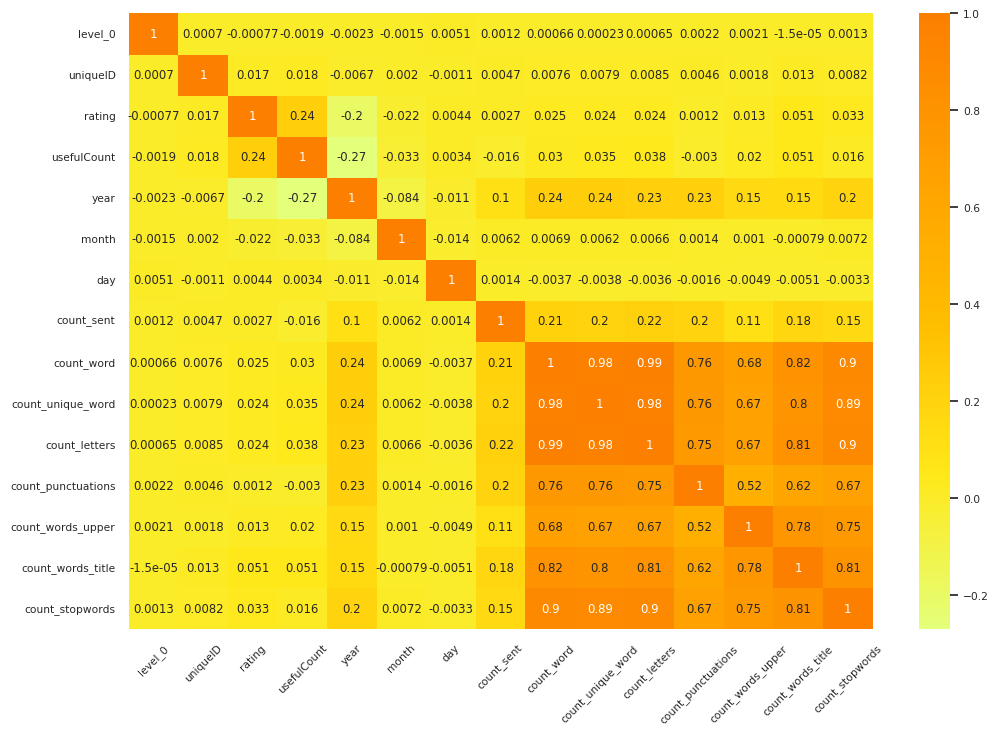

In [ ]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [12,8]
sns.set(font_scale = 0.7)
corr = df_all.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'Wistia')
plt.setp(sns_.get_xticklabels(), rotation = 45);

In [ ]:
# Assuming df is your DataFrame
# df_all.to_pickle("/content/drive/MyDrive/drug_review_dataset_drugs_com/df_all.pkl")
# Loading the DataFrame
# df_all = pd.read_pickle("/content/drive/MyDrive/drug_review_dataset_drugs_com/df_all.pkl")

In [ ]:
df_all.head()

level_0  uniqueID        drugName        condition  \
78050     78751     22170        Baclofen        Neuralgia   
20265     20456    167840      Eletriptan         Migraine   
152816   154156     90017       Risperdal           Autism   
47403     47829    186620  Desvenlafaxine      ibromyalgia   
57216     57729     92507     Ondansetron  Nausea/Vomiting   

                                                   review  rating       date  \
78050   "I have suffered with pain from lower back dis...       8 2015-07-05   
20265   "I have suffered from migraines for many years...      10 2009-06-04   
152816  "My son was recently perscribed this medicine....       8 2008-12-19   
47403   "I was diagnosed with Fibromyalgia approximate...      10 2009-10-22   
57216   "The only medication that really does the tric...      10 2015-03-09   

        usefulCount  Sentiment  year  ...  sentiment_clean_ss  count_sent  \
78050            30        1.0  2015  ...            0.034611           1   
20265             8        1.0  2009  ...            0.084848           1   
152816           77        1.0  2008  ...            0.113636           3   
47403            60        1.0  2009  ...            0.077273           1   
57216            52        1.0  2015  ...            0.212500           1   

       count_word  count_unique_word  count_letters count_punctuations  \
78050          49                 46            273                 10   
20265          48                 42            270                 11   
152816         11                 11             77                  5   
47403          72                 57            401                 32   
57216          20                 20            125                  9   

        count_words_upper  count_words_title  count_stopwords  mean_word_len  
78050                   4                  9               46       4.591837  
20265                   5                 11               50       4.645833  
152816                  0                  3               12       6.090909  
47403                  10                 18               70       4.583333  
57216                   1                  3               24       5.300000  

[5 rows x 26 columns]

In [ ]:
# Label Encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    df_all[feature] = label_encoder_feat[feature].fit_transform(df_all[feature])

The Label Encoder is used to change the categorical values of Drug Names and the conditions in to numerical values for the machine learning modelling. There are 3,667 unique drugs in the dataset that's why One hot encoder is not used as it would generate 3,667 new features and it would be very computationally expensive.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, accuracy_score
from lightgbm import early_stopping
import joblib

# Ensure df_train and df_test are defined and have the necessary columns
# Example: df_train = pd.read_csv('train_data.csv')
# df_test = pd.read_csv('test_data.csv')
target = df_all['Sentiment']
feats = ['condition','usefulCount','day','year','month','count_sent', 'sentiment_value', 'sentiment_clean_ss',
'count_word', 'count_unique_word', 'count_letters', 'count_punctuations',
'count_words_upper', 'count_words_title', 'count_stopwords', 'mean_word_len']

# sub_preds = np.zeros(df_test.shape[0])

# Split the data into train and validation sets
trn_x, test_x, trn_y, test_y = train_test_split(df_all[feats], target, test_size=0.3, random_state=42)

feature_importance_df = pd.DataFrame()
model_file_path = '/content/drive/MyDrive/drug_review_dataset_drugs_com/lgb_model.pkl'

# Check if the model file exists
if os.path.exists(model_file_path):
    print("Loading the pre-trained model...")
    # Load the pre-trained model
    lgb_model = joblib.load(model_file_path)
else:

    # Initialize the classifier
    lgb_model = lgb.LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.1,
        num_leaves=30,
        subsample=0.9,
        max_depth=7,
        reg_alpha=0.1,
        reg_lambda=0.1,
        min_split_gain=0.01,
        min_child_weight=2,
        verbosity=-1,  # Use verbosity for logging, -1 to suppress output
    )

    # Fit the model with early stopping and evaluation set
    lgb_model.fit(trn_x, trn_y)

    # Save the trained model for future use
    joblib.dump(lgb_model, model_file_path)
    print("Model trained and saved!")

# Predict using the trained model
sub_preds = lgb_model.predict(test_x)
cm = confusion_matrix(test_y, sub_preds)
# Optionally, evaluate the model performance
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy_score(test_y, sub_preds))

# # Optionally, get feature importances if needed
# feature_importance_df['feature'] = trn_x.columns
# feature_importance_df['importance'] = clf.feature_importances_
# print("Feature Importances:")

# print(feature_importance_df)

Loading the pre-trained model...
Confusion Matrix:
[[10938  4926]
 [ 1202 46550]]
Accuracy: 0.903672032193159


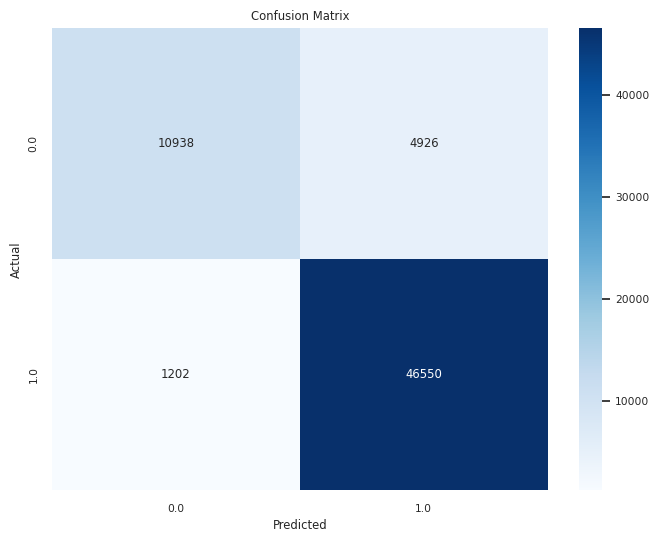

In [ ]:
# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lgb_model.classes_, yticklabels=lgb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# hyperparameter tuning
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, accuracy_score
from lightgbm import early_stopping
import joblib
from sklearn.model_selection import RandomizedSearchCV
# Define the model file path
model_file_path = '/content/drive/MyDrive/drug_review_dataset_drugs_com/best_lgb_model.pkl'


# Check if the model file exists
if os.path.exists(model_file_path):
    print("Loading the pre-trained model...ca")
    # Load the pre-trained model
    best_model = joblib.load(model_file_path)
else:
    print("Training the model...")
    # If the model doesn't exist, train it

    # Initialize the classifier
    clf = lgb.LGBMClassifier(
        learning_rate=0.1,
        num_leaves=30,
        subsample=0.9,
        max_depth=7,
        reg_alpha=0.1,
        reg_lambda=0.1,
        min_split_gain=0.01,
        min_child_weight=2,
        verbosity=-1  # Suppress verbose output
    )

    # Define the parameter distribution for RandomizedSearchCV, including n_estimators
    param_dist = {
        'n_estimators': [5000, 10000, 15000],  # Varying n_estimators
        'learning_rate': [0.05, 0.1, 0.15],
        'num_leaves': [20, 30, 40, 50],
        'max_depth': [5, 7, 10, -1]
    }

    # Initialize RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=clf,
        param_distributions=param_dist,
        n_iter=10,  # Number of iterations to sample from the parameter space
        scoring='accuracy',
        cv=3,  # Cross-validation folds
        verbose=1,
        n_jobs=-1,  # Use all CPU cores
        random_state=42
    )

    # Fit the randomized search
    random_search.fit(trn_x, trn_y)

    # Best Parameters
    print("Best parameters found: ", random_search.best_params_)
    print("Best accuracy: ", random_search.best_score_)

    # Extract results and plot performance for each set of hyperparameters
    results = pd.DataFrame(random_search.cv_results_)
    results = results[['param_learning_rate', 'param_num_leaves', 'param_max_depth', 'mean_test_score']]

    # Plot performance
    plt.figure(figsize=(10,6))
    for learning_rate in results['param_learning_rate'].unique():
      temp = results[results['param_learning_rate'] == learning_rate]
      plt.plot(temp['param_num_leaves'], temp['mean_test_score'], label=f'Learning rate: {learning_rate}')

    plt.xlabel('Number of Leaves')
    plt.ylabel('Mean Test Accuracy')
    plt.title('Performance vs Number of Leaves for Different Learning Rates')
    plt.legend()
    plt.show()

    # Get the best model
    best_model = random_search.best_estimator_

    # Save the trained model for future use
    joblib.dump(best_model, model_file_path)
    print("Model trained and saved!")

Loading the pre-trained model...ca


Confusion Matrix:
[[11129  4735]
 [ 1118 46634]]
Accuracy: 0.9079948440643864
F1 Score: 0.91


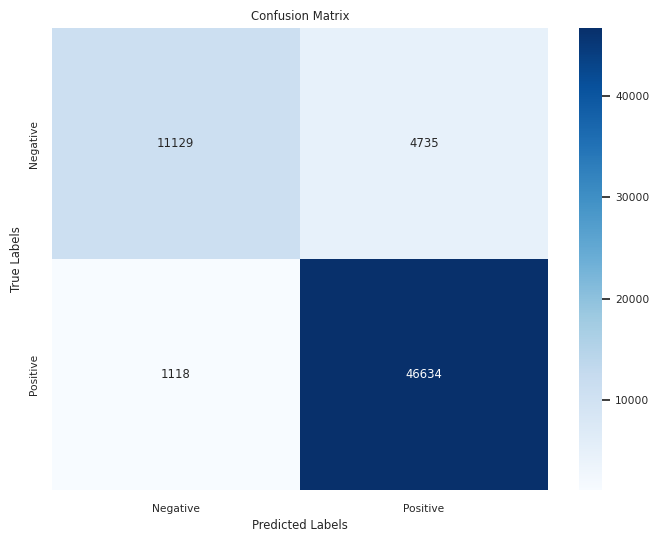

In [ ]:
# Evaluate the best model
sub_preds = best_model.predict(test_x)
cm = confusion_matrix(test_y, sub_preds)
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy_score(test_y, sub_preds))

# F1 Score
f1 = f1_score(sub_preds, test_y, average='weighted')  # Adjust 'average' as needed
print(f"F1 Score: {f1:.2f}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

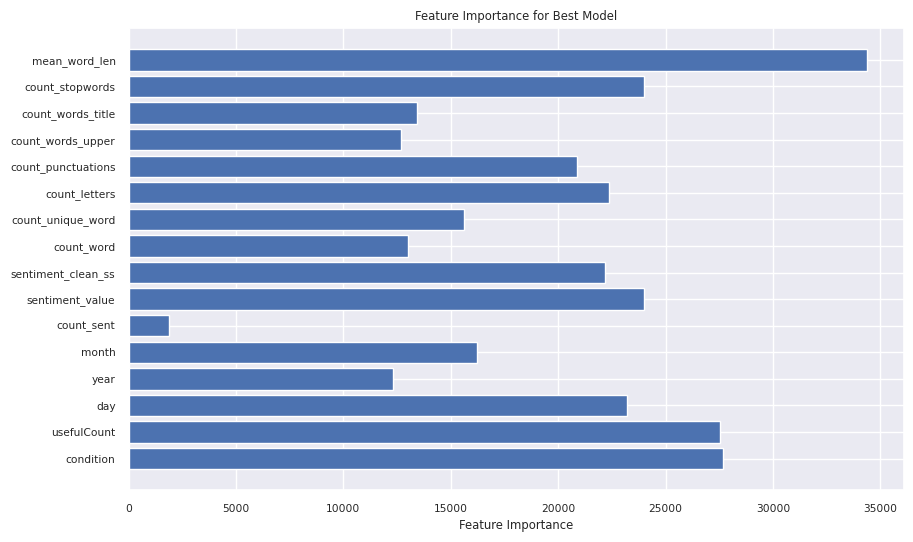

In [ ]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(trn_x.columns, best_model.feature_importances_)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Best Model')
plt.show()

Dictionary_Sentiment_Analysis

In [ ]:
# import dictionary data
word_table = pd.read_csv("/content/drive/MyDrive/drug_review_dataset_drugs_com/harvard_emotion_dict.csv")
word_table.head(10)

Entry Source  Positiv  Negativ
0            A  H4Lvd      NaN      NaN
1      ABANDON  H4Lvd      NaN  Negativ
2  ABANDONMENT     H4      NaN  Negativ
3        ABATE  H4Lvd      NaN  Negativ
4    ABATEMENT    Lvd      NaN      NaN
5     ABDICATE     H4      NaN  Negativ
6        ABHOR     H4      NaN  Negativ
7        ABIDE     H4  Positiv      NaN
8      ABILITY  H4Lvd  Positiv      NaN
9       ABJECT     H4      NaN  Negativ

In [ ]:
import re

#Positiv word list
temp_Positiv = []
Positiv_word_list = []
for i in range(0,len(word_table.Positiv)):
    if word_table.iloc[i,2] == "Positiv":
        temp = word_table.iloc[i,0].lower()
        temp1 = re.sub('\d+', '', temp)
        temp2 = re.sub('#', '', temp1)
        temp_Positiv.append(temp2)

Positiv_word_list = list(set(temp_Positiv))
len(temp_Positiv)
len(Positiv_word_list)  #del temp_Positiv

1637

In [ ]:
#Negativ word list
temp_Negativ = []
Negativ_word_list = []
for i in range(0,len(word_table.Negativ)):
    if word_table.iloc[i,3] == "Negativ":
        temp = word_table.iloc[i,0].lower()
        temp1 = re.sub('\d+', '', temp)
        temp2 = re.sub('#', '', temp1)
        temp_Negativ.append(temp2)

Negativ_word_list = list(set(temp_Negativ))
len(temp_Negativ)
len(Negativ_word_list)  #del temp_Negativ

2006

In [ ]:
# Reverting the label encoding for 'drugName' and 'condition'
for feature in ['drugName', 'condition']:
    df_all[feature] = label_encoder_feat[feature].inverse_transform(df_all[feature])

df_train, df_test = train_test_split(df_all, test_size=0.3, random_state=42)

In [ ]:
# counting the positive words
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary = Positiv_word_list)
content = df_test['review_clean']
X = vectorizer.fit_transform(content)
f = X.toarray()
f = pd.DataFrame(f)
f.columns=Positiv_word_list
df_test["num_Positiv_word"] = f.sum(axis=1)

# counting the negative words

vectorizer2 = CountVectorizer(vocabulary = Negativ_word_list)
content = df_test['review_clean']
X2 = vectorizer2.fit_transform(content)
f2 = X2.toarray()
f2 = pd.DataFrame(f2)
f2.columns=Negativ_word_list
df_test["num_Negativ_word"] = f2.sum(axis=1)

In [ ]:
# decide sentiment by positivity ratio
df_test["Positiv_ratio"] = df_test["num_Positiv_word"]/(df_test["num_Positiv_word"]+df_test["num_Negativ_word"])
df_test["sentiment_by_dic"] = df_test["Positiv_ratio"].apply(lambda x: 1 if (x>=0.5) else (0 if (x<0.5) else 0.5))

df_test.head()

level_0  uniqueID     drugName                condition  \
191076   192733    111095    Verapamil      High Blood Pressure   
67721     68337    195513       Aviane            Birth Control   
43054     43450    120086       Kadian             Chronic Pain   
97634     98506    222065  Fluconazole  Vaginal Yeast Infection   
48977     49410    172918   Clonazepam                  Anxiety   

                                                   review  rating       date  \
191076  "Been on 240mg once a day for about 4 years ha...       8 2014-12-05   
67721   "I&#039;ve been on Aviane for a little over a ...      10 2015-03-08   
43054   "I have a crushed unhealed ankle for nine and ...       7 2013-04-19   
97634   "Ok so I had a yeast infection for a whole mon...      10 2015-09-17   
48977   "I have been on Klonopin for 20 years. I&#039;...      10 2013-09-11   

        usefulCount  Sentiment  year  ...  count_letters  count_punctuations  \
191076           14        1.0  2014  ...             98                   6   
67721            22        1.0  2015  ...            138                  14   
43054            36        1.0  2013  ...            110                  12   
97634           107        1.0  2015  ...            371                  15   
48977           122        1.0  2013  ...            348                  22   

       count_words_upper  count_words_title  count_stopwords mean_word_len  \
191076                 0                  5               14      4.210526   
67721                  1                  4               14      4.560000   
43054                  2                  3               14      4.842105   
97634                 13                 18               73      4.723077   
48977                  9                 14               67      4.629032   

        num_Positiv_word  num_Negativ_word  Positiv_ratio  sentiment_by_dic  
191076               NaN               NaN            NaN               0.5  
67721                NaN               NaN            NaN               0.5  
43054                7.0               3.0       0.700000               1.0  
97634                NaN               NaN            NaN               0.5  
48977                8.0               5.0       0.615385               1.0  

[5 rows x 30 columns]

Drug Recommendation

In [ ]:
#normalized the usefulcount by dividing the total number of reviews for that condition

def userful_count(data):
    grouped = data.groupby(['condition']).size().reset_index(name='user_size')
    data = pd.merge(data,grouped,on='condition',how='left')
    return data

df_test =  userful_count(df_test)
df_test['usefulCount'] = df_test['usefulCount']/df_test['user_size']

In [ ]:
# Add predictions from deep learning and machine learning models, and sentiment analysis
df_test['deep_pred'] = sub_preds_deep  # Deep learning model predictions
df_test['machine_pred'] = sub_preds  # Lightgbm learning model predictions

# Calculate the total prediction score by combining the different prediction scores, weighted by the 'usefulCount' column
df_test['total_pred'] = (df_test['deep_pred'] + df_test['machine_pred'] + df_test['sentiment_by_dic']) * df_test['usefulCount']
df_test.head()

level_0  uniqueID     drugName                condition  \
0   192733    111095    Verapamil      High Blood Pressure   
1    68337    195513       Aviane            Birth Control   
2    43450    120086       Kadian             Chronic Pain   
3    98506    222065  Fluconazole  Vaginal Yeast Infection   
4    49410    172918   Clonazepam                  Anxiety   

                                              review  rating       date  \
0  "Been on 240mg once a day for about 4 years ha...       8 2014-12-05   
1  "I&#039;ve been on Aviane for a little over a ...      10 2015-03-08   
2  "I have a crushed unhealed ankle for nine and ...       7 2013-04-19   
3  "Ok so I had a yeast infection for a whole mon...      10 2015-09-17   
4  "I have been on Klonopin for 20 years. I&#039;...      10 2013-09-11   

   usefulCount  Sentiment  year  ...  count_stopwords  mean_word_len  \
0     0.015267        1.0  2014  ...               14       4.210526   
1     0.001913        1.0  2015  ...               14       4.560000   
2     0.064171        1.0  2013  ...               14       4.842105   
3     0.112277        1.0  2015  ...               73       4.723077   
4     0.052226        1.0  2013  ...               67       4.629032   

  num_Positiv_word  num_Negativ_word  Positiv_ratio sentiment_by_dic  \
0              NaN               NaN            NaN              0.5   
1              NaN               NaN            NaN              0.5   
2              7.0               3.0       0.700000              1.0   
3              NaN               NaN            NaN              0.5   
4              8.0               5.0       0.615385              1.0   

   user_size  deep_pred  machine_pred  total_pred  
0        917   0.412221           1.0    0.029194  
1      11503   0.726458           1.0    0.004258  
2        561   0.989969           1.0    0.191870  
3        953   0.726458           1.0    0.249980  
4       2336   0.726458           1.0    0.142392  

[5 rows x 34 columns]

In [ ]:
# Group the data by condition and drug name, and calculate the mean of the total prediction score for each group
df_recommend = df_test.groupby(['condition','drugName']).agg({'total_pred' : ['mean']})

# Sort the dataframe by the mean of total_pred in descending order to prioritize drugs with higher scores
sorted_df = df_recommend.sort_values(('total_pred', 'mean'), ascending=False)
sorted_df.head(40)

total_pred
                                                                  mean
condition                                   drugName                  
Glioblastoma Multi                          Bevacizumab     184.484785
Ichthyosis                                  AmLactin        157.699614
Anemia, Chemotherapy Induced                Aranesp         145.452518
lic Acid Deficiency                         Deplin          130.618842
Zollinger-Ellison Syndrome                  Prilosec        107.499805
Dissociative Identity Disorde               Sertraline      100.878929
Breast Cancer, Prevention                   Tamoxifen        95.737674
Vitamin D Deficiency                        Vitamin D2       90.542606
Mild Cognitive Impairment                   Aricept ODT      84.605386
Dementia                                    Haloperidol      84.038548
Abortion                                    Cytotec          81.395794
Aspergillosis, Aspergilloma                 Itraconazole     77.926014
Aphthous Ulce                               Triamcinolone    77.926014
Peptic Ulce                                 Protonix         74.935432
Myxedema Coma                               Synthroid        72.496648
Hypotension                                 Midodrine        72.396414
Esophageal Candidiasis                      Fluconazole      70.133412
NSAID-Induced Gastric Ulce                  Nexium           65.434981
Ear Wax Impaction                           Debrox           64.567269
Ischemic Stroke                             Clopidogrel      64.196192
Malignant Glioma                            Avastin          63.878929
Glioblastoma Multiforme                     Avastin          63.121751
Thrombocythemia                             Hydrea           62.718003
Neutropenia                                 Filgrastim       61.326556
Varicose Veins                              Horse chestnut   58.618837
Tuberculosis, Prophylaxis                   Isoniazid        58.033309
Schilling Test                              Cyanocobalamin   57.255608
Esophageal Candidiasis                      Diflucan         54.383412
Hyperlipoproteinemia Type IIa, Elevated LDL Welchol          53.384704
Thrombocytopenia                            Eltrombopag      51.208523
Hyperlipoproteinemia Type IV, Elevated VLDL Niaspan          48.982066
Pediatric Growth Hormone Deficiency         Humatrope        47.498364
Vitamin D Deficiency                        Ergocalciferol   46.906580
Macular Degeneration                        Eylea            46.711756
Diagnosis and Investigation                 Arginine         45.085765
AIDS Related Wasting                        Dronabinol       44.865214
Herpes Zoster, Prophylaxis                  Zostavax         43.137434
Aspiration Pneumonia                        Clindamycin      41.947365
Hidradenitis Suppurativa                    Adalimumab       41.434981
Premature Ventricular Depolarizations       Metoprolol       41.434981

In [ ]:
# Normalize the 'condition' column in sorted_df to lowercase
sorted_df.index = sorted_df.index.set_levels([sorted_df.index.levels[0].str.lower(), sorted_df.index.levels[1]])

# Update the function to match lowercase condition names
def get_drug_by_condition(sorted_df, condition):
    # Convert input condition to lowercase to match the normalized index
    condition_lower = condition.lower()
    # Get predicted values for the condition
    if condition_lower in sorted_df.index.levels[0]:
        condition_df = sorted_df.loc[condition_lower]
        # Get drug with the highest predicted value
        drug = condition_df[condition_df == condition_df.max()].index.get_level_values('drugName')[0]
        return drug
    else:
        print(f"Condition '{condition}' not found.")
        return None

# Example usage
condition = input("Please enter condition: ")
drug = get_drug_by_condition(sorted_df, condition)
if drug:
    print(f"Drug with highest predicted value for condition '{condition}': {drug}")


Please enter condition: dementia
Drug with highest predicted value for condition 'dementia': Haloperidol


In [ ]:
df_test.head(
)

level_0  uniqueID     drugName                condition  \
0   192733    111095    Verapamil      High Blood Pressure   
1    68337    195513       Aviane            Birth Control   
2    43450    120086       Kadian             Chronic Pain   
3    98506    222065  Fluconazole  Vaginal Yeast Infection   
4    49410    172918   Clonazepam                  Anxiety   

                                              review  rating       date  \
0  "Been on 240mg once a day for about 4 years ha...       8 2014-12-05   
1  "I&#039;ve been on Aviane for a little over a ...      10 2015-03-08   
2  "I have a crushed unhealed ankle for nine and ...       7 2013-04-19   
3  "Ok so I had a yeast infection for a whole mon...      10 2015-09-17   
4  "I have been on Klonopin for 20 years. I&#039;...      10 2013-09-11   

   usefulCount  Sentiment  year  ...  count_stopwords  mean_word_len  \
0     0.015267        1.0  2014  ...               14       4.210526   
1     0.001913        1.0  2015  ...               14       4.560000   
2     0.064171        1.0  2013  ...               14       4.842105   
3     0.112277        1.0  2015  ...               73       4.723077   
4     0.052226        1.0  2013  ...               67       4.629032   

  num_Positiv_word  num_Negativ_word  Positiv_ratio sentiment_by_dic  \
0              NaN               NaN            NaN              0.5   
1              NaN               NaN            NaN              0.5   
2              7.0               3.0       0.700000              1.0   
3              NaN               NaN            NaN              0.5   
4              8.0               5.0       0.615385              1.0   

   user_size  deep_pred  machine_pred  total_pred  
0        917   0.412221           1.0    0.029194  
1      11503   0.726458           1.0    0.004258  
2        561   0.989969           1.0    0.191870  
3        953   0.726458           1.0    0.249980  
4       2336   0.726458           1.0    0.142392  

[5 rows x 34 columns]